> # Analysis of efood's Orders

#### **@ Michalis Karampasis**
---

*Some info about Michalis:*
* *Contact with him at* ***mixaliskarabasis@gmail.com***
* *Search him on [**LinkedIn**](https://www.linkedin.com/in/michaliskarampasis/)*
* *Explore his projects on [**GitHub**](https://github.com/michaliskarampasis)*

---

In this Assessment, our **goals** are:
* To perform an **exploratory analysis on the customer data** (we may use existing classes as well)
* To **prepare a presentation** in order to share our findings/insights with the Chief Marketing Officer & other C-level executives
* To **recommend users** to target in an upcoming coupon campaign dedicated to **Breakfast cuisine** (we should include them in our presentation)

### Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install squarify
import squarify
%matplotlib inline

from functions.eda import *
from functions.recommend_users import *

# configuration of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

> ## Data Collection & Cleansing

The `orders.csv` is a dummy dataset with basic information regarding efood orders of smaller cities during August and September 2023.

Below some more information about our data:

* **order_id**: Unique identifier for each order
* **user_id**: Unique identifier for user
* **user_class_name**: Based on RFM shows the importance of the userfor efood. Calculated on a monthly level
* **order_timestamp**: Local timestamp of the order
* **city**: City-location
* **vertical**: (Restaurant|Local Stores) group of main cuisines
* **cuisine**: The main cuisine ordered
* **device**: Device used by user
* **paid_cash**: TRUE when user paid cash FALSE for online payments
* **order_contains_offer**: TRUE when order contains items in offer
* **coupon_discount_amount**: Actual discount in euros when coupon applied
* **amount**: Actual amount that user paid in euros
* **delivery_cost**: Actual amount that user paid for delivery service in euros

### Read Data

In [2]:
# read the data
orders = pd.read_csv('./data/orders.csv')

# preview
orders.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07 UTC,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0


### Data Infos

In [3]:
orders.shape

(656209, 13)

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656209 entries, 0 to 656208
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                656209 non-null  int64  
 1   user_id                 656209 non-null  int64  
 2   user_class_name         656209 non-null  object 
 3   order_timestamp         656209 non-null  object 
 4   city                    656209 non-null  object 
 5   vertical                656209 non-null  object 
 6   cuisine                 656209 non-null  object 
 7   device                  656209 non-null  object 
 8   paid_cash               656209 non-null  bool   
 9   order_contains_offer    656209 non-null  bool   
 10  coupon_discount_amount  656209 non-null  float64
 11  amount                  656209 non-null  float64
 12  delivery_cost           656209 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 56.3+ MB


### Convert data types

* Both **columns regarding ids** are of int type
* Therefore, we need to change their type and **convert them to categorical**
* Moreover, `timestamp` column is presented as categorical variable, so we will **convert it to datetime type**

In [5]:
# convert ids from int to object type
orders.order_id = orders.order_id.astype('object')
orders.user_id = orders.user_id.astype('object')

# convert the order_timestamp column from object to datetime
orders.order_timestamp = pd.to_datetime(orders.order_timestamp)

# preview the data types
orders.dtypes

order_id                               object
user_id                                object
user_class_name                        object
order_timestamp           datetime64[ns, UTC]
city                                   object
vertical                               object
cuisine                                object
device                                 object
paid_cash                                bool
order_contains_offer                     bool
coupon_discount_amount                float64
amount                                float64
delivery_cost                         float64
dtype: object

**General infos of our data**

In [6]:
# print number of rows in DF
print(f'Rows: {orders.shape[0]} \n')

# print number of features in DF
print(f'Features: {orders.shape[1]} \n')

# print total number of missing values
print(f'Missing Values: {orders.isnull().values.sum()} \n')

# print number of unique values per feature location
print(f'Unique Values:\n{orders.nunique()} \n')

Rows: 656209 

Features: 13 

Missing Values: 0 

Unique Values:
order_id                  656209
user_id                   101379
user_class_name                6
order_timestamp           600595
city                          15
vertical                       2
cuisine                        5
device                         4
paid_cash                      2
order_contains_offer           2
coupon_discount_amount       496
amount                      2705
delivery_cost                 14
dtype: int64 



**Create Revenue Variable**

In [7]:
# computation of revenue
orders['revenue'] = orders.amount + orders.delivery_cost - orders.coupon_discount_amount

In [8]:
print(f'The total revenue is {round(orders.revenue.sum(),0)} euros')

The total revenue is 6450156.0 euros


**Extract date information from timestamp**

In [9]:
orders['date'] = pd.to_datetime(orders.order_timestamp.dt.date)
orders['year'] = orders.order_timestamp.dt.year
orders['month'] = orders.order_timestamp.dt.strftime('%B')
orders['dayofmonth'] = orders.order_timestamp.dt.day
orders['time'] = orders.order_timestamp.dt.time
orders['hour'] = orders.order_timestamp.dt.hour
orders['dayofweek'] = orders.order_timestamp.dt.strftime('%A')
orders['week'] = orders.order_timestamp.dt.isocalendar().week
orders['flag_weekend'] = orders.order_timestamp.dt.weekday > 5

In [10]:
# preview final df
orders.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False


> # Exploratory Data Analysis

* Let's see some **general informations** regarding our dataset

In [11]:
# create df for eda
orders_eda = orders.copy()

In [12]:
orders_eda.columns

Index(['order_id', 'user_id', 'user_class_name', 'order_timestamp', 'city',
       'vertical', 'cuisine', 'device', 'paid_cash', 'order_contains_offer',
       'coupon_discount_amount', 'amount', 'delivery_cost', 'revenue', 'date',
       'year', 'month', 'dayofmonth', 'time', 'hour', 'dayofweek', 'week',
       'flag_weekend'],
      dtype='object')

In [13]:
orders_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656209 entries, 0 to 656208
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   order_id                656209 non-null  object             
 1   user_id                 656209 non-null  object             
 2   user_class_name         656209 non-null  object             
 3   order_timestamp         656209 non-null  datetime64[ns, UTC]
 4   city                    656209 non-null  object             
 5   vertical                656209 non-null  object             
 6   cuisine                 656209 non-null  object             
 7   device                  656209 non-null  object             
 8   paid_cash               656209 non-null  bool               
 9   order_contains_offer    656209 non-null  bool               
 10  coupon_discount_amount  656209 non-null  float64            
 11  amount                  65

In [14]:
orders_eda.describe()

,coupon_discount_amount,amount,delivery_cost,revenue,year,dayofmonth,hour,week
count,656209.000000,656209.000000,656209.000000,656209.000000,656209.0,656209.000000,656209.000000,656209.000000
mean,0.079634,9.783079,0.125978,9.829423,2023.0,15.786182,15.058536,35.085256
std,0.561622,7.413664,0.325226,7.479638,0.0,8.827831,5.375193,2.502259
min,0.000000,0.000000,0.000000,0.000000,2023.0,1.000000,0.000000,31.000000
25%,0.000000,5.000000,0.000000,5.000000,2023.0,8.000000,11.000000,33.000000
50%,0.000000,7.890000,0.000000,8.000000,2023.0,16.000000,15.000000,35.000000
75%,0.000000,12.500000,0.000000,12.600000,2023.0,23.000000,20.000000,37.000000
max,22.420000,493.500000,5.000000,493.500000,2023.0,31.000000,23.000000,39.000000


> ## (1) User Demographics

We will begin our analysis by trying to **analyze data related to user demographics**. 

More specifically:
* We are going to **compute the totals** regarding demographic data.
* Then, will **analyze** `user_class_name` to understand the importance of different user classes
* At last, we will **explore the distribution of user types** (RFM categories) and their **contribution to revenue**.

In [15]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False


**Compute some totals regarding demographic data**

In [16]:
# find the total number of orders 
total_orders = len(orders_eda.order_id)

# find the total number of unique users
num_of_unique_users = len(orders_eda.user_id.unique())

# calculate the number of orders in each Class
number_of_orders_per_class = orders_eda.user_class_name.value_counts()

# group by class
grouped_by_class = orders_eda.user_id.groupby(orders_eda.user_class_name)
number_of_unique_users_per_class = grouped_by_class.nunique()

print(f'In our data we have:\n\nTotal Number of Orders: {total_orders}\
                            \nTotal Number of Users: {num_of_unique_users}\
                            \n\nTotal Orders per Class:\n{number_of_orders_per_class}\
                            \n\nTotal Users in each Class:\n{number_of_unique_users_per_class}')

In our data we have:

Total Number of Orders: 656209                            
Total Number of Users: 101379                            

Total Orders per Class:
All Star         231499
Loyal            130967
Common User      124879
High Spenders     69580
Infrequent        66643
One Timers        32641
Name: user_class_name, dtype: int64                            

Total Users in each Class:
user_class_name
All Star         11606
Common User      28980
High Spenders    12171
Infrequent       32035
Loyal            13759
One Timers       30228
Name: user_id, dtype: int64


**Plot classes based on Orders and Users**

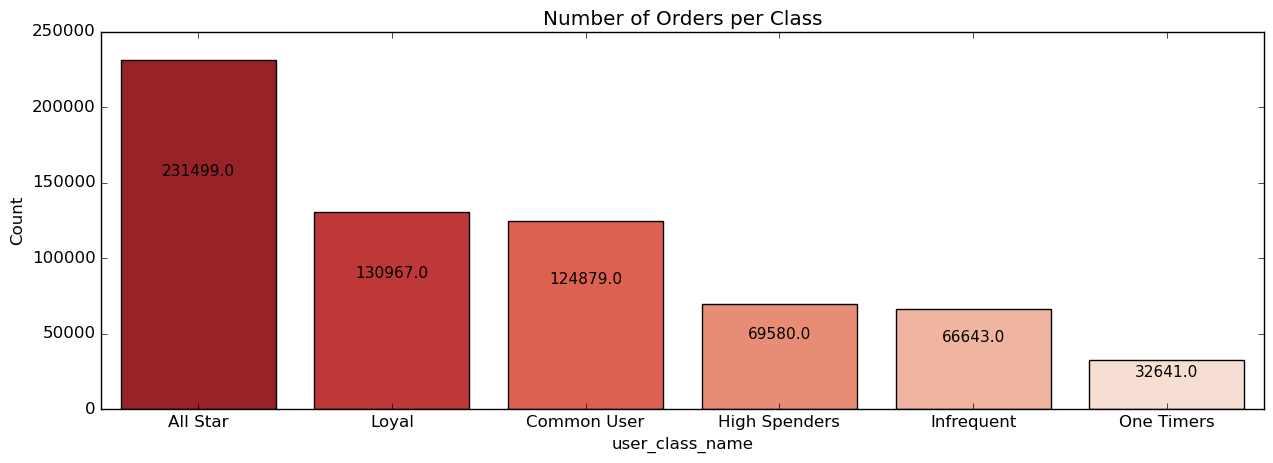

In [17]:
# specify order of classes
class_order = ['All Star','Loyal','Common User','High Spenders','Infrequent','One Timers']

# sort the columns based on the class order
number_of_orders_per_class = number_of_orders_per_class[class_order]

# function to create barplot for number of orders per class
barplot_for_orders_per_class('user_class_name',orders_eda,number_of_orders_per_class,kind_of_group = 'Orders')

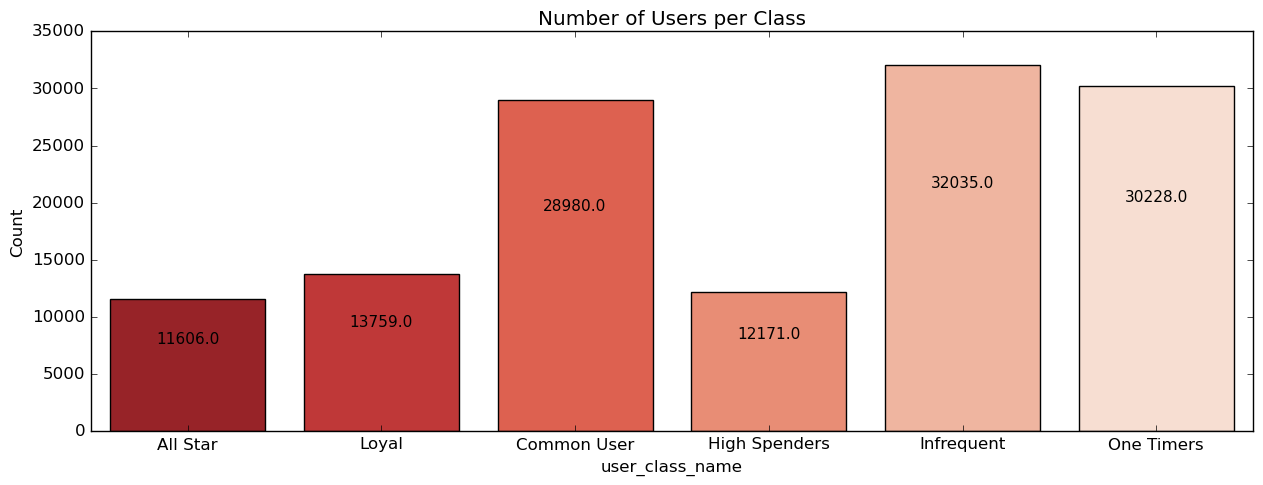

In [18]:
# sort the columns based on the class order
number_of_unique_users_per_class = number_of_unique_users_per_class[class_order]

# function to create barplot for number of orders per class
barplot_for_orders_per_class('user_class_name',orders_eda,number_of_unique_users_per_class,kind_of_group = 'Users')

Analyzing the above barplots, we can say a few things regarding our classes:

* The `All Star` class includes users who are **highly engaged** and make a significant number of orders. While they **represent a smaller number of users** (11606), they **contribute a substantial share of the total orders** (231499).
* `Loyal` users are also **highly engaged** and make a significant number of orders (130967), indicating **strong brand loyalty**.
* `Common User` users, while **more numerous** (28980), still **make a substantial number of orders** (124879).
* `High Spenders` represent **users who make fewer orders** (12171) **but with higher average order values**, which can be a **valuable segment for revenue generation**.
* `Infrequent` users make a **notable number of orders** (66643) **but** are **the largest class regarding number of users** (32035).
* `One Timers` are users who make relatively **few orders** (32641), indicating minimal repeat business.

**Compute total revenue regarding each class**

In [19]:
# sum up revenue of each class
revenue_per_class = orders_eda.groupby('user_class_name').agg({'revenue':'sum'}).reset_index() 

# preview df
revenue_per_class

,user_class_name,revenue
0,All Star,2050744.70
1,Common User,1344508.32
2,High Spenders,1125553.91
3,Infrequent,742690.87
4,Loyal,743778.27
5,One Timers,442879.66


**Plot classes based on revenue**

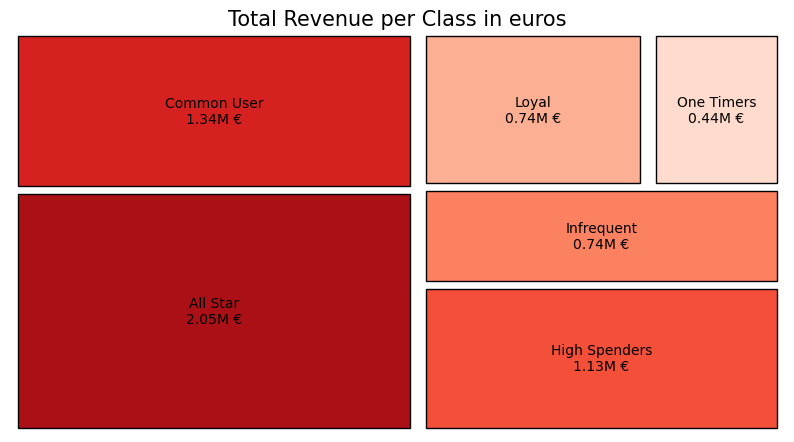

In [20]:
# function to plot revenue per class
plot_revenue_per_class(revenue_per_class)

**General Comments per Class**

| user_class_name | Revenue       |
|-----------------|---------------|
| All Star        | 2,050,744.70€ |
| Common User     | 1,344,508.32€ |
| High Spenders   | 1,125,553.91€ |
| Infrequent      | 742,690.87€   |
| Loyal           | 743,778.27€   |
| One Timers      | 442,879.66€   |

* **All Star**: 
    * Are our **top-tier customers**
    * They have **contributed the highest revenue**, totaling 2.05M €
    * They are **highly engaged** and likely to **make frequent and high-value orders**

* **Common User**:
    * Common Users are a **significant customer segment**
    * They have generated revenue of 1.34M €
    * These users are **regular customers, but their spending are lower compared to All Stars**

* **High Spenders**:
    * High Spenders are also an **important group**
    * They've **contributed** 1,13M € in revenue
    * While they might **not order as frequently** as Common Users they tend to **spend more per order**.

* **Infrequent**:
    * Infrequent users have generated revenue of 0.74M €
    * They **place orders less often**, which is reflected in their **lower contribution to revenue**.

* **Loyal**:
    * Loyal customers have generated 0.74M € in revenue, similar to Infrequent users.
    * These customers may **not order as frequently** as All Stars, but they **show consistent loyalty** to the platform.

* **One Timers**:
    * One Timers are users who have ordered just once, resulting in revenue of 0.44M €
    * They are **the least engaged group** and may not represent a substantial ongoing revenue source

> ## (2) User Behavior

We continue by **trying to understand the user behaviour**. 

More specifically:
* We are going to **explore the devices** (device) used by users and their **impact on order** patterns
* After that, will **analyze the payment methods** (paid_cash) and the shift towards online payments

In [21]:
# preview df
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False


**Let's find out:**
* **how many orders have been placed** for every device 
* which **device** the users **refer the most**
* **how many** of the orders have been **paid online** for each device

In [22]:
# create column for online payment
orders_eda['paid_online'] = np.where(orders_eda.paid_cash ==False,1,0)

# group values by device and count orders
df_device = orders_eda.groupby(['device']).agg({'order_id':'count',\
                                                        'user_id':'nunique',\
                                                        'paid_online':'sum'})

# sort values on descending order
df_device = df_device.sort_values('order_id',ascending=False)

# preview df
df_device

,order_id,user_id,paid_online
device,,,
Android,315609,50553,149433
iOS,250037,37675,118093
MobWeb,51560,10496,21651
Desktop,39003,7649,19648


**Plot Total Orders, Total users, Total Inline Payments per each Device**

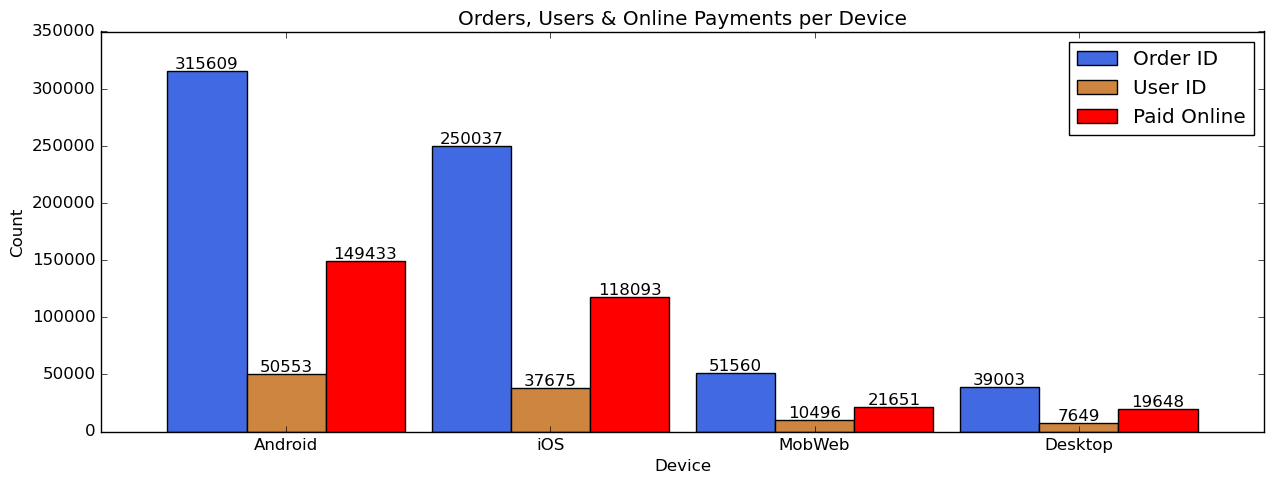

In [23]:
# function to plot info regarding devices
barplot_devices(df_device)

**Continuing, let's discover how users prefer to pay**

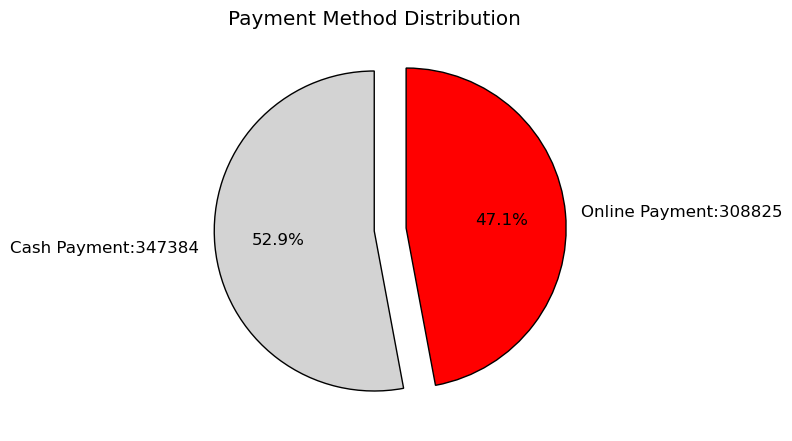

In [24]:
# function to plot payment methods
pie_chart_payment_method(orders_eda)

* Generally, users **prefer to pay with cash**
* Let's see if this is a **constant phenomenon** through the days **or** if there is a **trend of change**

In [25]:
# create column for online payment
orders_eda['paid_cash_v2'] = np.where(orders_eda.paid_cash==False,0,1)

# group values by date and type of payment
df_device_per_date = orders_eda.groupby(['date']).agg({'paid_online':'sum',\
                                                        'paid_cash_v2':'sum'}).reset_index()

# compute the percentage deviation (%)
df_device_per_date['dev'] = round((df_device_per_date['paid_cash_v2'] - df_device_per_date['paid_online'])*100/(df_device_per_date['paid_cash_v2'] + df_device_per_date['paid_online']),1)

# sort values on descending order
df_device_per_date = df_device_per_date.sort_values('date',ascending=True).set_index('date')

# preview df
df_device_per_date.head()

,paid_online,paid_cash_v2,dev
date,,,
2023-08-01,4604,5209,6.2
2023-08-02,4758,5371,6.1
2023-08-03,4758,5244,4.9
2023-08-04,4993,5454,4.4
2023-08-05,4741,5392,6.4


**Plot the time series regarding type of payment**

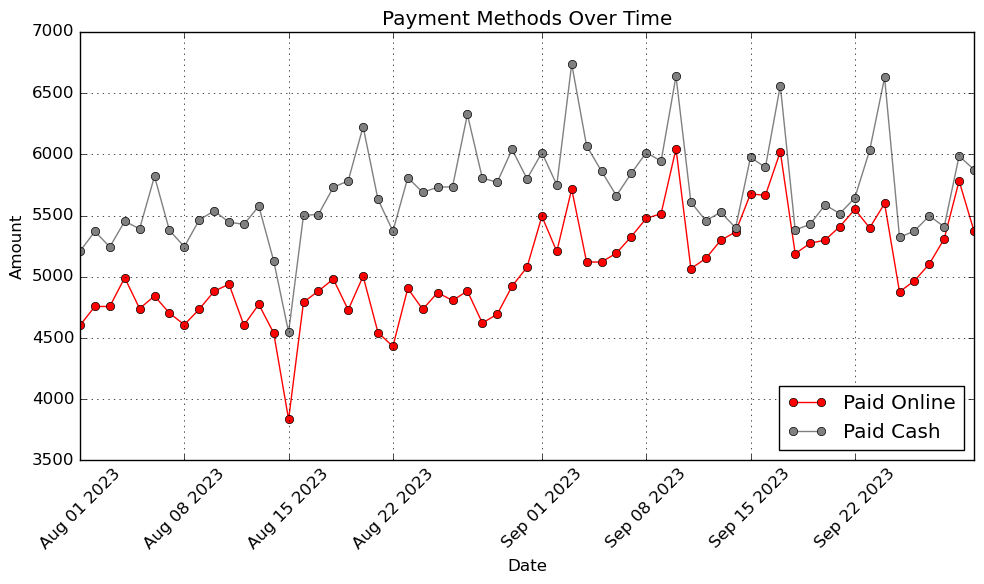

In [26]:
# function to plot time series regarding payment methods
time_series_payment_methods(df_device_per_date)

**Plot Deviation**

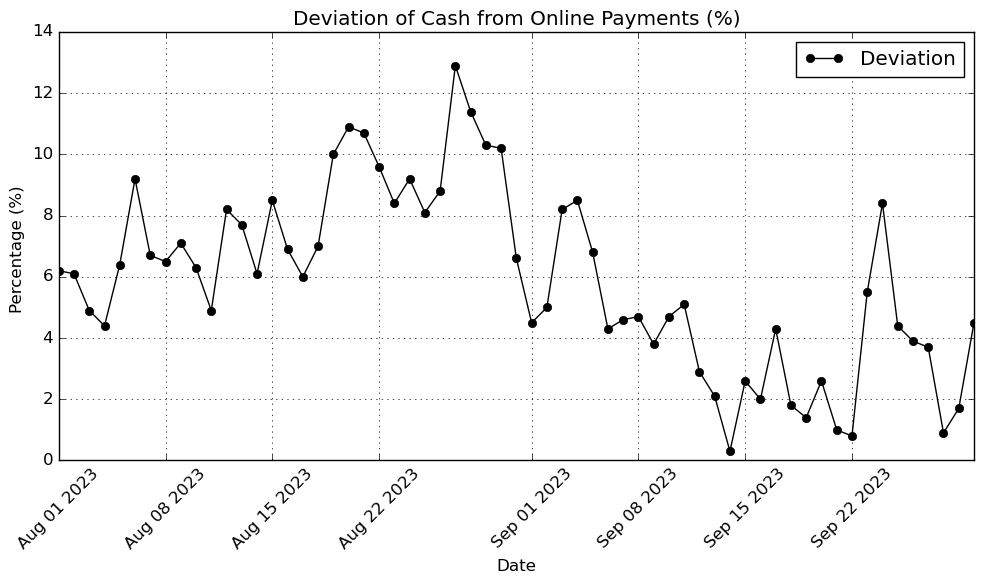

In [27]:
# function to plot time series regarding deviation of payment methods
time_series_payment_methods_deviation(df_device_per_date)

* There is a **trend** showing that there is a **preference for Online Payments in the first half of the month**
* **Possible reasons** could be the convenience of online payment methods, such as credit cards or digital wallets, or perhaps the timing coincides with the receipt of paychecks, making online payments more feasible
* Then, there is a **shift towards cash payments in the later half of the month**
* This change might be associated with various **factors**, such as users running low on funds in their bank accounts and opting for cash payments
* It could also **reflect different payment habits among users**, some of whom may prefer cash transactions for specific expense

> ## (3) User Retention and Engagement

Next, we will try to **understand the user retention**. 

More specifically:
* We are going to examine user_id to **identify repeat customers** and their **contribution to revenue**
* After that, will calculate monthly user **retention rates** and monthly user **churn rate**

In [28]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0


* We will start, by finding **how many times each user has placed an order** and then find the user ids of repeaters
* **Repeaters** are those how have placed an order **more than one time in one day**

**Find and flag repeaters**

In [29]:
# group by user_id and count the number of orders
user_order_counts = orders_eda.groupby(['user_id','date'])['order_id'].count().reset_index()

# filter the repeaters (users with more than one order)
repeaters = user_order_counts[user_order_counts['order_id'] > 1]

# add column for repeater customer in basic df
orders_eda['flag_repeaters'] = np.where(orders_eda.user_id.isin(repeaters.user_id.to_list()),1,0)

**Compare Repeaters & Non Repeaters**

* In **Daily** Level

In [30]:
# group by date and flag repeaters for revenue
revenue_df = orders_eda.groupby(['date', 'flag_repeaters'])['revenue'].sum().unstack().reset_index()
revenue_df.columns = ['date', 'one_time_customers_revenue', 'repeaters_revenue']

# group by date and flag repeaters for order count
order_count_df = orders_eda.groupby(['date', 'flag_repeaters'])['order_id'].count().unstack().reset_index()
order_count_df.columns = ['date', 'one_time_customers_orders', 'repeaters_orders']

# join both dfs on date
repeaters_df_daily = pd.merge(revenue_df, order_count_df, on='date')

repeaters_df_daily.head()

,date,one_time_customers_revenue,repeaters_revenue,one_time_customers_orders,repeaters_orders
0,2023-08-01,44114.64,49590.54,3887,5926
1,2023-08-02,45586.39,51763.59,3959,6170
2,2023-08-03,44927.82,51889.51,3948,6054
3,2023-08-04,49034.69,52781.78,4201,6246
4,2023-08-05,52153.29,53781.44,4149,5984


* In **Monthly** Level

In [31]:
# add month
repeaters_df_daily['month'] = repeaters_df_daily.date.dt.strftime('%B')

# group by month 
repeaters_df_monthly = repeaters_df_daily.groupby(['month']).agg({'one_time_customers_revenue':'sum',\
                                                                  'repeaters_revenue':'sum',\
                                                                  'one_time_customers_orders':'sum',\
                                                                  'repeaters_orders':'sum'})

repeaters_df_monthly

,one_time_customers_revenue,repeaters_revenue,one_time_customers_orders,repeaters_orders
month,,,,
August,1521484.53,1664812.17,128497,191440
September,1552383.49,1711475.54,135921,200351


**Plot The Monthly Comparison of Repeaters vs Non Repeaters**

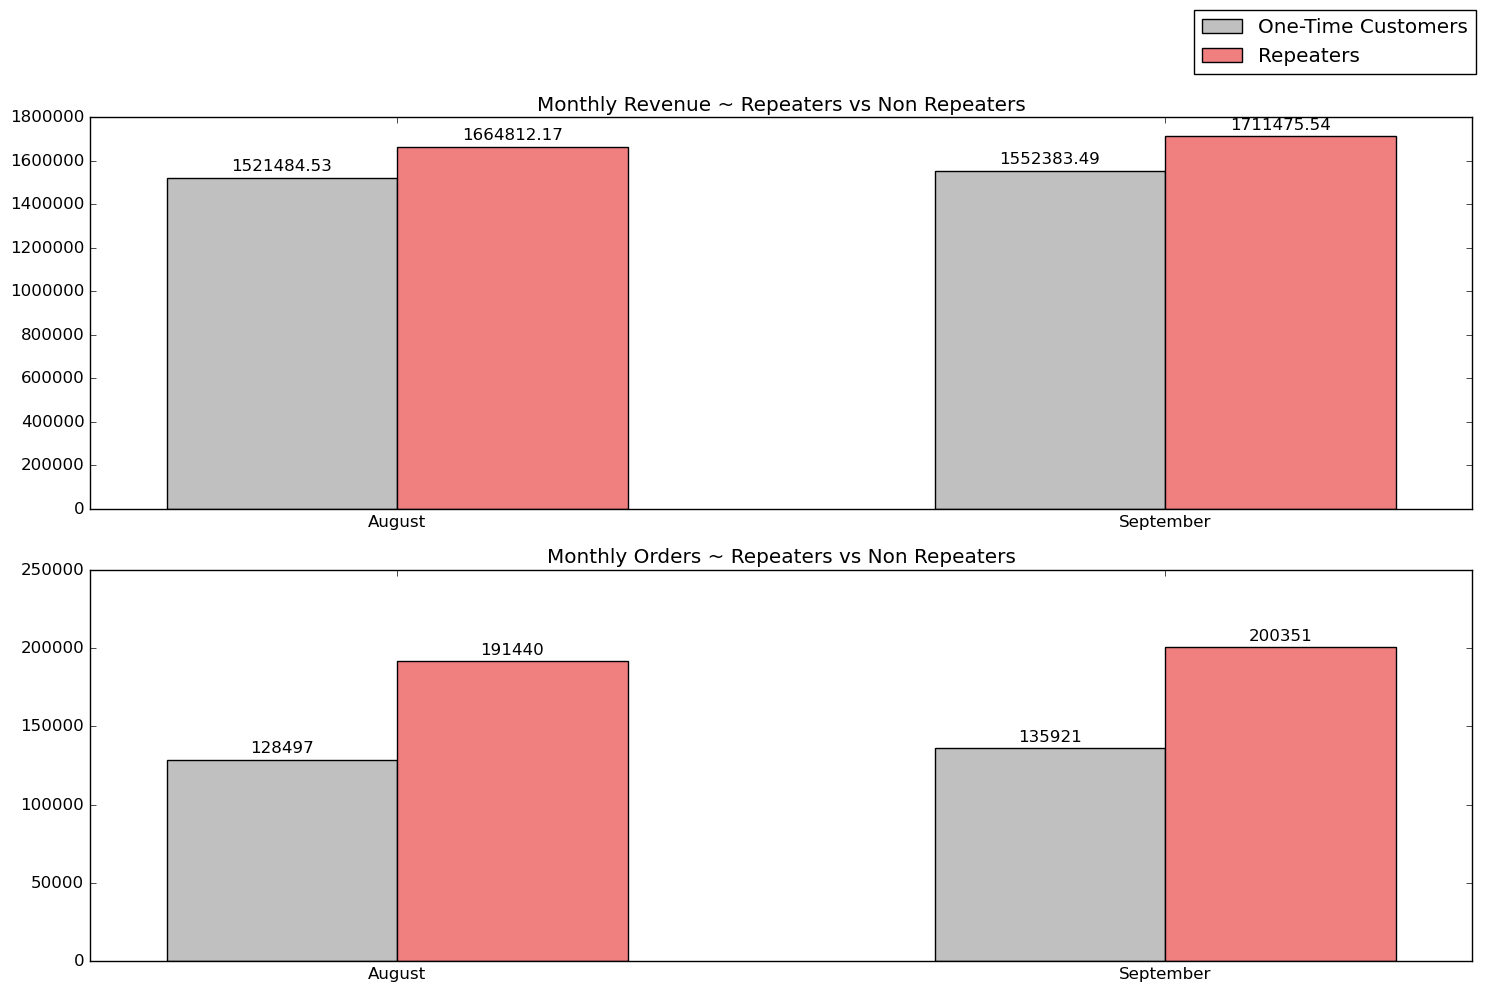

In [32]:
# function to plot comparison of repeaters and non repeaters
compare_repeaters_monthly(repeaters_df_monthly)

* Understanding the above plots, in August and September, repeaters generated consistently **higher revenue and placed more orders than one-time customers**
* So, in order the company to **maximize revenue and engagement**, it is advisable to focus on retaining and nurturing existing customers (repeaters) since they **not only generate higher revenue but also place more orders**
* By implementing **loyalty programs**, personalized recommendations, and special offers can manage to strengthen customer retention and increase their lifetime value.
* Based on the above, let's analyze the retention rate.

**Compute Customer Retention Rate (CRR)**

* The customer retention rate is a measure of **how many customers continue to do business with a company over a specific period**, typically expressed as a percentage. 

* To **compute the customer retention rate**, we can use the following formula (more info [here](https://www.zendesk.com/blog/calculate-customer-retention-rate/)):

 $ \text{CCR} = \left(\frac{CE - CN}{CS}\right) \times 100 $

Where:

* CE is the number of customers at the **end of the period**.
* CN is the number of new customers **acquired during the period**.
* CS is the number of customers at the **start of the period**.

In [33]:
# find the number of customers at the beginning of the period.
number_of_users_per_dom = orders_eda.groupby(['month']).agg({'user_id':'nunique'}).reset_index()

number_of_users_per_dom.head()

,month,user_id
0,August,72779
1,September,74572


In [34]:
# how many new users came in september?

# find the users we had on august
user_id_august = orders_eda.user_id[(orders_eda.month=='August')].unique().tolist()

# find new users
new_users_list = orders_eda.user_id[(orders_eda.month=='September') \
                             & (~orders_eda.user_id.isin(user_id_august))].unique().tolist()

* Since we have compute all the metrics, let's **calculate the formula**

In [35]:
# number of customers at the start of the period
CS = number_of_users_per_dom.user_id[number_of_users_per_dom.month=='August'].values[0]

# number of new customers acquired during the period
CN = len(new_users_list)

# number of customers at the end of the period.
CE = number_of_users_per_dom.user_id[number_of_users_per_dom.month=='September'].values[0]

# Compute Customer Retention Rate
CRR = round(((CE-CN)/CS)*100,1)

print(f'The Monthly Customer Retention Rate is {CRR} %')
print(f'The Monthly Customer Churn Rate is {100-CRR} %')

The Monthly Customer Retention Rate is 63.2 %
The Monthly Customer Churn Rate is 36.8 %


> ## (4) Order Trends

Continuing, we aim to:
* Compare August and September to spot any **monthly variations regarding orders**
* Plot a **time series analysis** of order_timestamp to identify any significant **trends or seasonality**.

In [36]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1


**Orders per Month**

In [37]:
# count orders per Month
orders_per_month = orders_eda.groupby(['month']).agg({'order_id':'count'})

# preview
orders_per_month

,order_id
month,
August,319937
September,336272


**Orders per Day of week & per Month**

In [38]:
# group by month and day of week
orders_per_dayofweek  = orders_eda.groupby(['month','dayofweek']).agg({'order_id':'count'}).reset_index()

# pivot the data to create the desired format
pivot_dayofweek = orders_per_dayofweek.pivot(index="month", columns="dayofweek", values="order_id")

# specify the order of days of the week
day_order = ["Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday","Monday"]

# sort the columns of the pivot_df based on the day_order
pivot_dayofweek = pivot_dayofweek[day_order]

# preview pivot table
pivot_dayofweek

dayofweek,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
month,,,,,,,
August,48323,52304,52118,42150,41222,43458,40362
September,42636,43172,43589,57619,56663,49952,42641


**Orders per Hour & per Month**

In [39]:
# group by month and hour
orders_per_hour =  orders_eda.groupby(['month','hour']).agg({'order_id':'count'}).reset_index()

# pivot the data to create the desired format
pivot_hour = orders_per_hour.pivot(index="month", columns="hour", values="order_id")

# preview pivot table
pivot_hour

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,,,,
August,6252,3538,2041,1075,630,410,801,4630,12205,18734,20952,19379,17888,19532,20884,19298,16438,16165,15789,15610,21942,30807,22604,12333
September,5942,3296,1686,959,497,324,752,5136,12524,17359,19503,18625,18192,21311,22872,21402,17740,17236,16929,18566,27895,32462,22708,12356


**Plot time series**

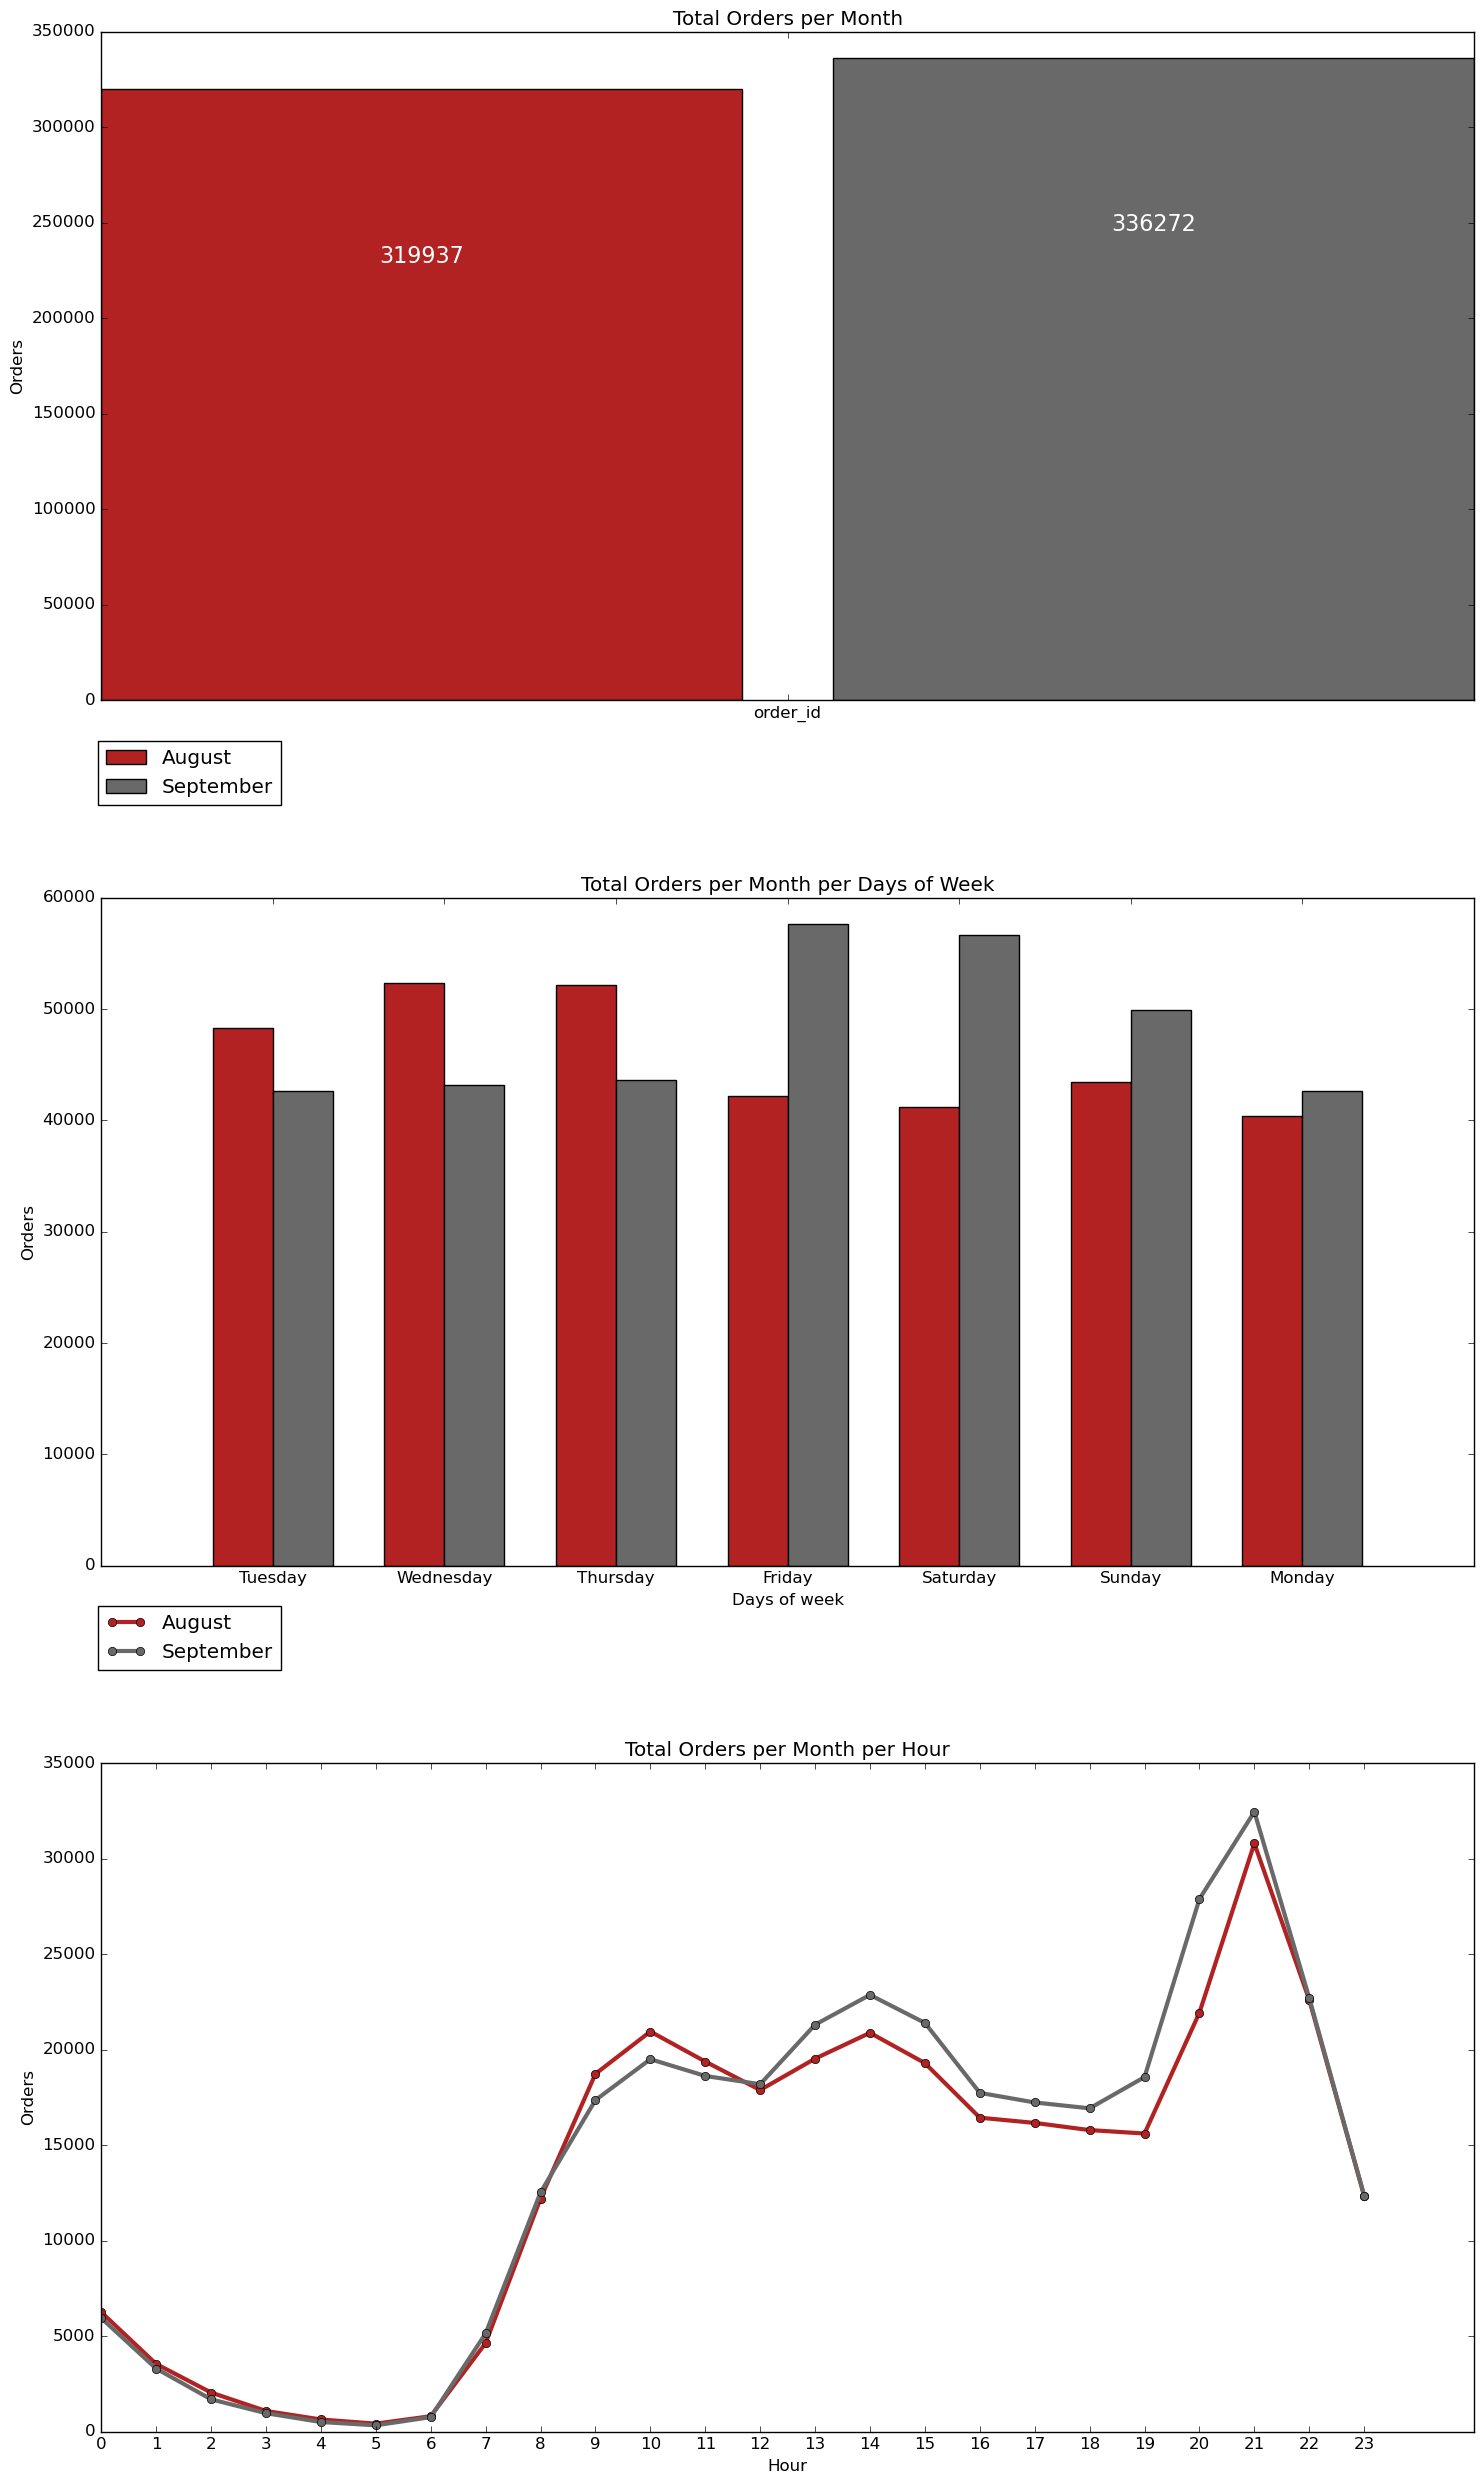

In [40]:
# function to plot order trends in monthly level
plot_order_trends_monthly(orders_per_month,pivot_dayofweek,pivot_hour)  

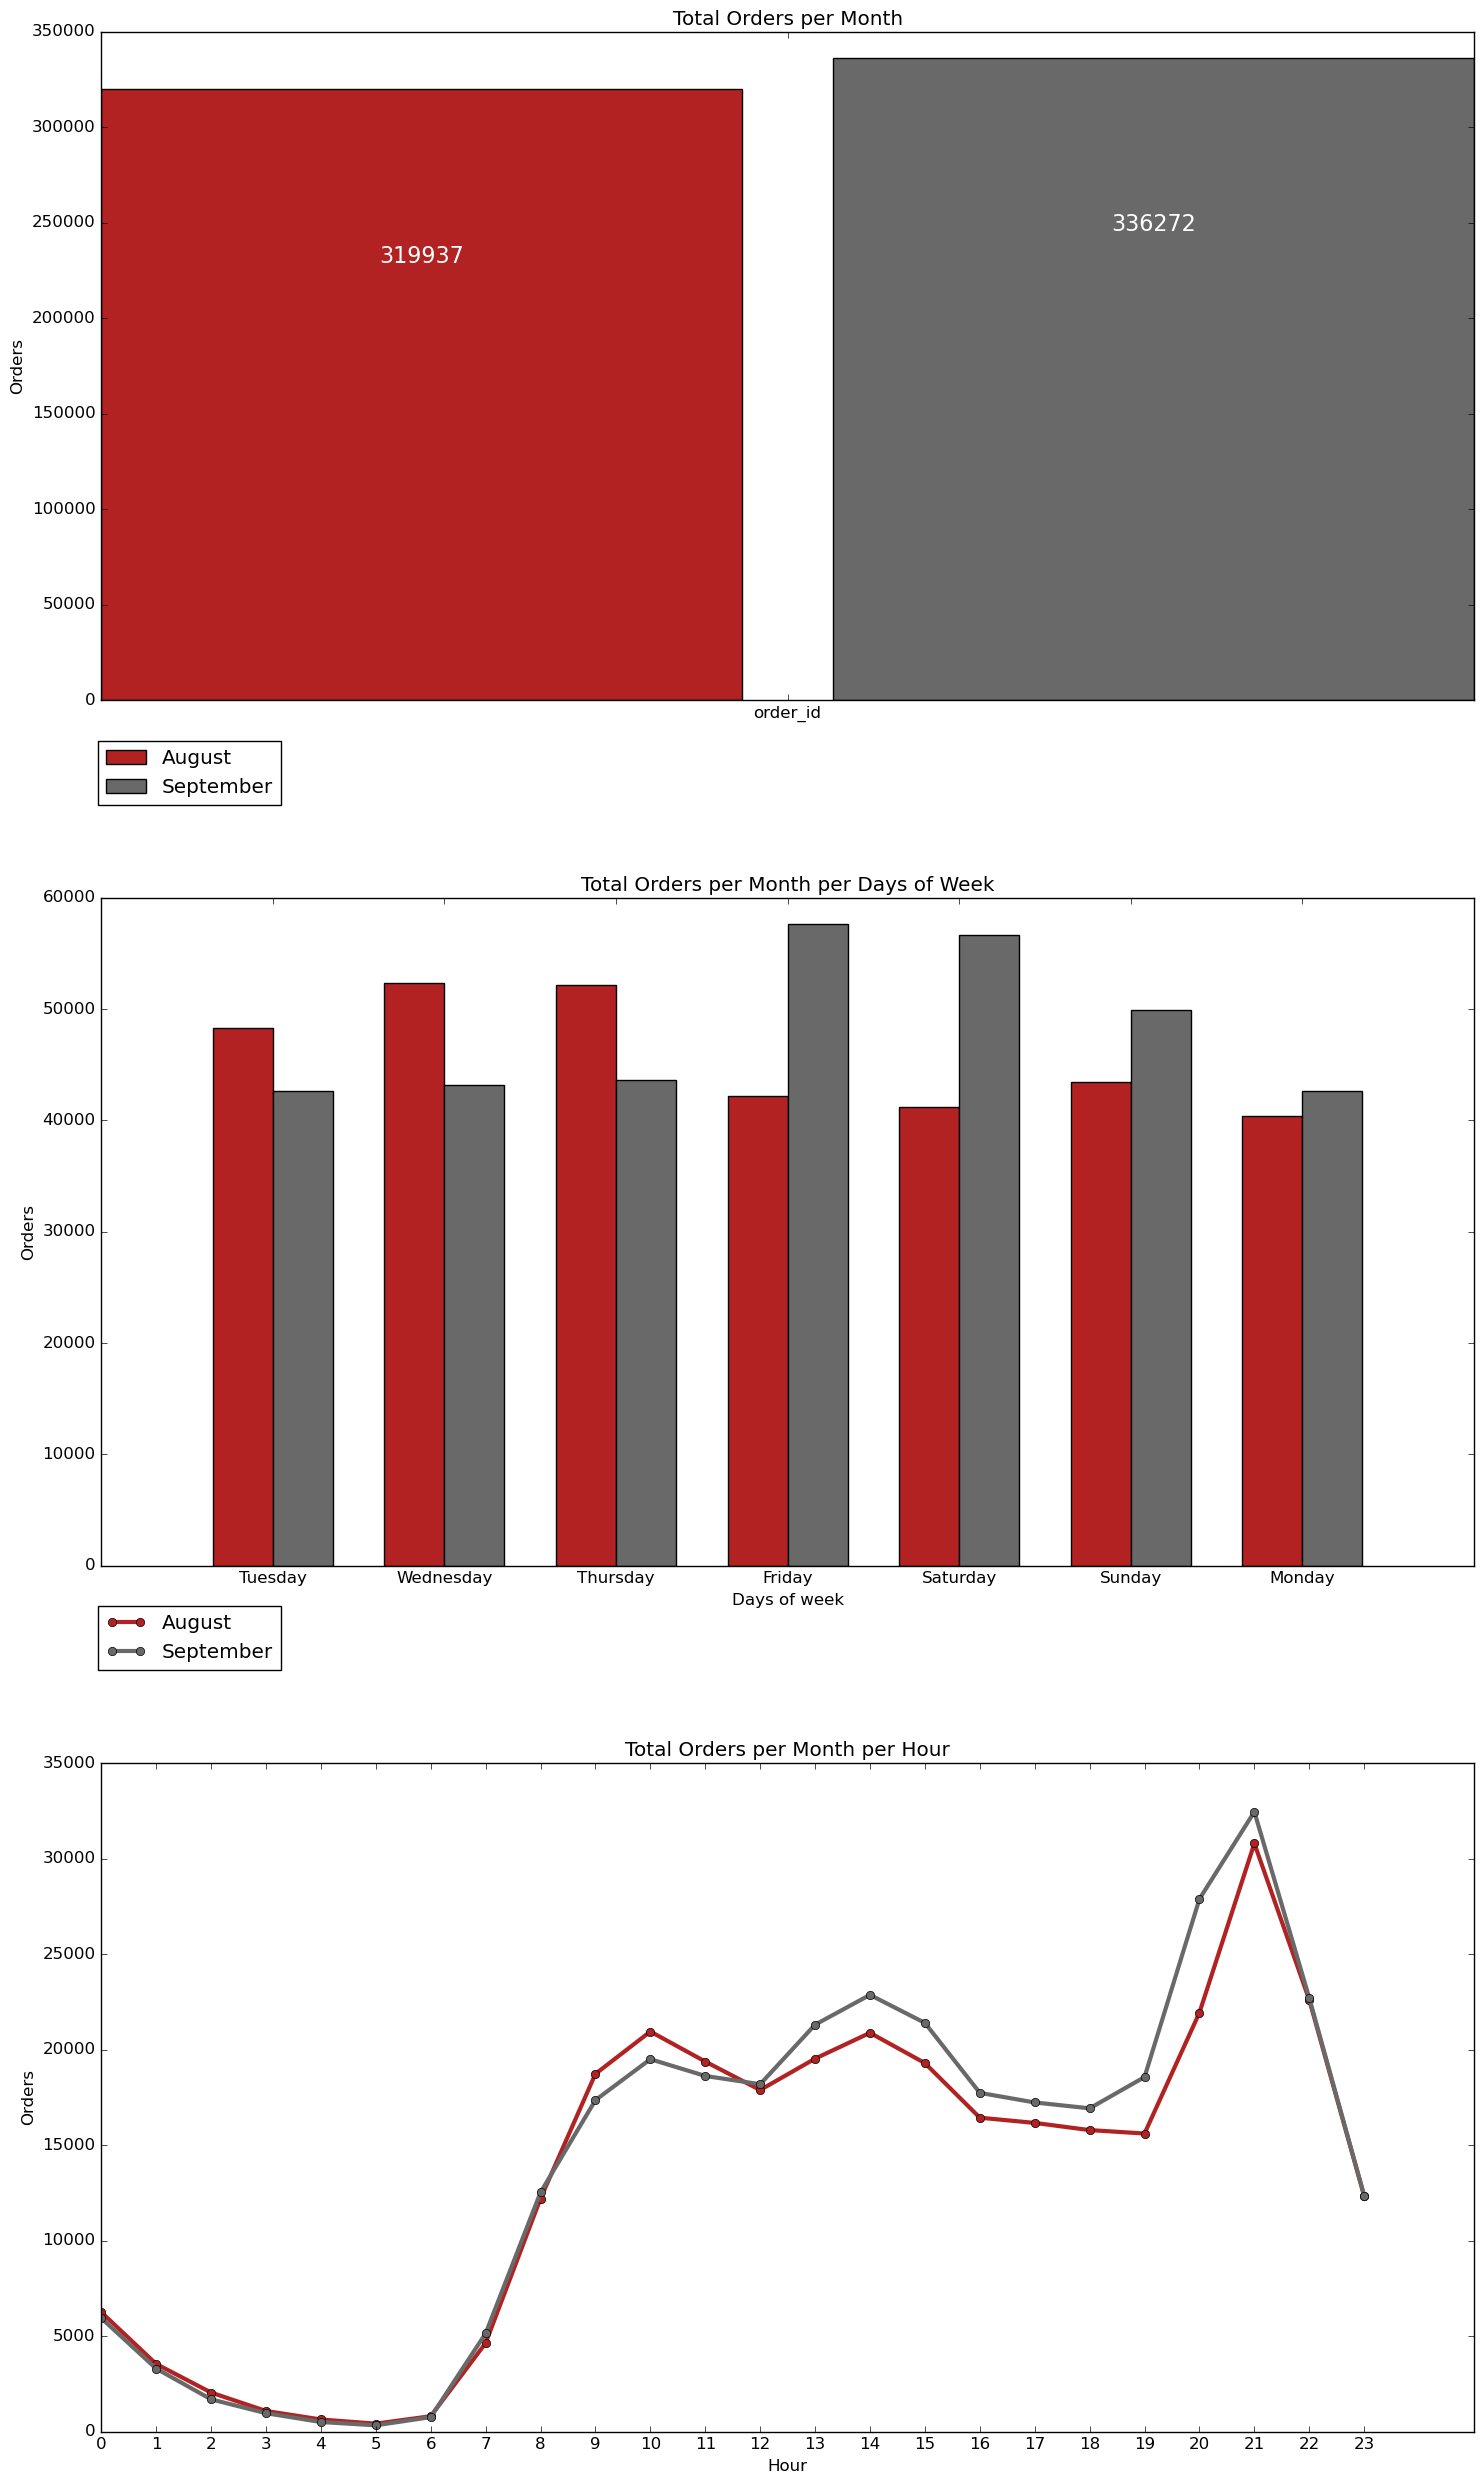

In [41]:
# create a figure
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(15, 25), dpi=100, facecolor='white')

# plot the first bar plot
x = np.arange(len(orders_per_month.columns))
ax1.bar(x - 0.4/2, orders_per_month.loc['August'], width=0.35, label='August',color='firebrick')
ax1.bar(x + 0.4/2, orders_per_month.loc['September'], width=0.35, label='September',color='dimgrey')

# define title for the first subplot
ax1.set_title('Total Orders per Month')
ax1.set_ylabel('Orders')

# add values at the bars for the first subplot
for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=16, color='white', xytext=(0, -120), textcoords='offset points')

# add labels to the first subplot
months = orders_per_month.columns.to_list()
ax1.set_xticks(x)
ax1.set_xticklabels(months, rotation=0)

# plot the second bar plot 
x = np.arange(len(pivot_dayofweek.columns))
ax2.bar(x - 0.35/2, pivot_dayofweek.loc['August'], width=0.35, label='August',color='firebrick')
ax2.bar(x + 0.35/2, pivot_dayofweek.loc['September'], width=0.35, label='September',color='dimgrey')

# define x labels for the second subplot
ax2.set_xticks(x)
ax2.set_xticklabels(pivot_dayofweek.columns)

# define title and hide the legend for the second subplot
ax2.set_title('Total Orders per Month per Days of Week')
ax2.set_xlabel('Days of week')
ax2.set_ylabel('Orders')
ax2.legend(loc = 'upper left',bbox_to_anchor=(-0.01, 1.25))

# plot the third bar plot
x = np.arange(len(pivot_hour.columns))
ax3.plot(x, pivot_hour.loc['August'], label='August', marker='o', linestyle='-',color='firebrick', linewidth=3)
ax3.plot(x, pivot_hour.loc['September'], label='September', marker='o', linestyle='-',color='dimgrey', linewidth=3)

# define x labels for the third subplot
ax3.set_xticks(x)
ax3.set_xticklabels(pivot_hour.columns)

# define title and hide the legend for the third subplot
ax3.set_title('Total Orders per Month per Hour')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Orders')
ax3.legend(loc = 'upper left',bbox_to_anchor=(-0.01, 1.25))

plt.tight_layout()

# save image
plt.savefig('./images/eda/4.order_trends/Total Orders per time.png', bbox_inches='tight')

plt.show()


* August and September show **different monthly order patterns**, with September having a **higher number of orders** compared to August
* This difference could be due to various factors, such as **seasonal variations or changes in customer behavior**
* In **weekly level**, Friday and Saturday have the highest order volumes, particularly in September
* Also from Monday to Thursday, August is **higher** than September while in Friday-Sunday, **customers order more in September**
*  **Peak order times differ**, with August showing a **peak** in the evening, and September showing a **more balanced distribution** with **higher order volumes throughout the day**
* Understanding these **hourly patterns** can inform resource allocation and delivery scheduling

> ## (5) Location Analysis

Next we will **analyze the location of orders**.

We will succeed that by:
* Examine the **distribution of orders across different cities** to identify high-potential locations
* **Analyze delivery cost** to understand variations in delivery charges across cities

In [42]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1


**Orders per Location**

In [43]:
# count orders per city
orders_per_city = orders_eda.groupby(['city']).agg({'order_id':'count'})

# sort based on orders
orders_per_city = orders_per_city.sort_values(by='order_id',ascending=False)

# preview
orders_per_city

,order_id
city,
Ρόδος,160471
Ιωάννινα,120035
Ξάνθη,106317
Αγρίνιο,82262
Αλεξανδρούπολη,59162
Δράμα,50678
Αίγιο,18449
Άρτα,15399
Ραφήνα,13576


**Plot Orders per Locations**

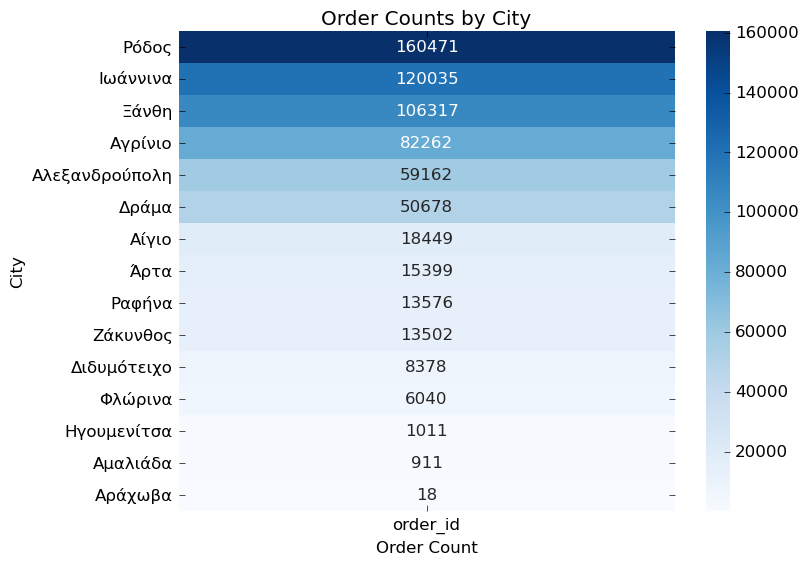

In [44]:
# function to plot the comparison of locations
heatmap_orders_per_city(orders_per_city)

**Orders per Location & per Hour**

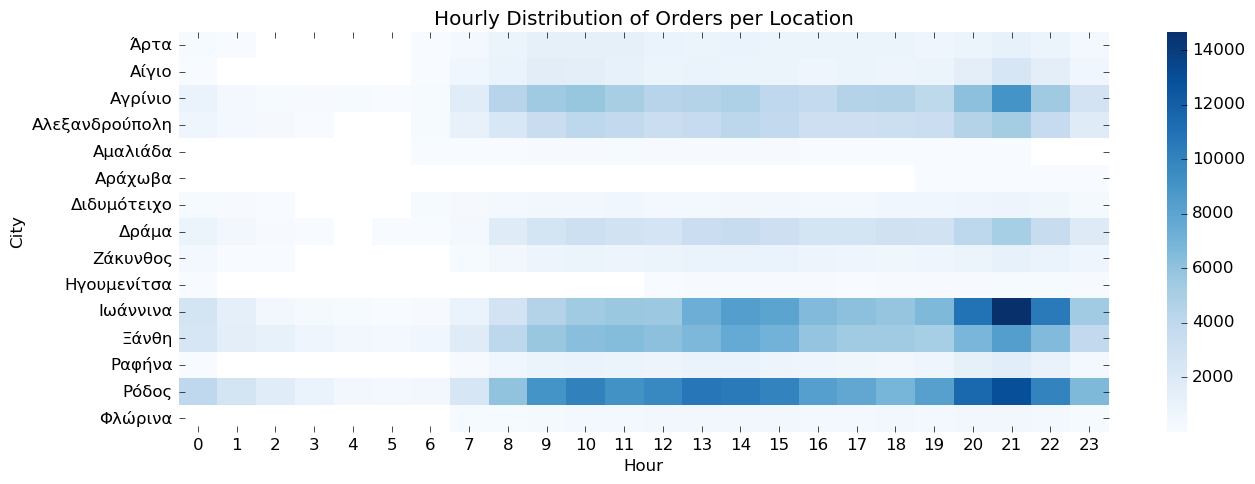

In [45]:
# count orders per city
orders_per_city_per_hour = orders_eda.groupby(['hour','city']).agg({'order_id':'count'}).reset_index()

# pivot the data to prepare it for heatmap
heatmap_data = orders_per_city_per_hour.pivot('hour', 'city', 'order_id')

# function to plot the comparison of locations per hour
heatmap_orders_per_city_per_hour(heatmap_data)

**Locations & Delivery Costs**

In [46]:
# count orders per city
orders_per_city_del_cost = orders_eda.groupby(['city']).agg({'order_id':'count','delivery_cost':'mean'})

# sort based on orders
orders_per_city_del_cost = orders_per_city_del_cost.sort_values(by='order_id',ascending=False)

# preview
orders_per_city_del_cost

,order_id,delivery_cost
city,,
Ρόδος,160471,0.203439
Ιωάννινα,120035,0.043155
Ξάνθη,106317,0.071225
Αγρίνιο,82262,0.000000
Αλεξανδρούπολη,59162,0.150319
Δράμα,50678,0.540704
Αίγιο,18449,0.000000
Άρτα,15399,0.000000
Ραφήνα,13576,0.000000


**Plot Total Orders per Location vs Avg Delivery costs**

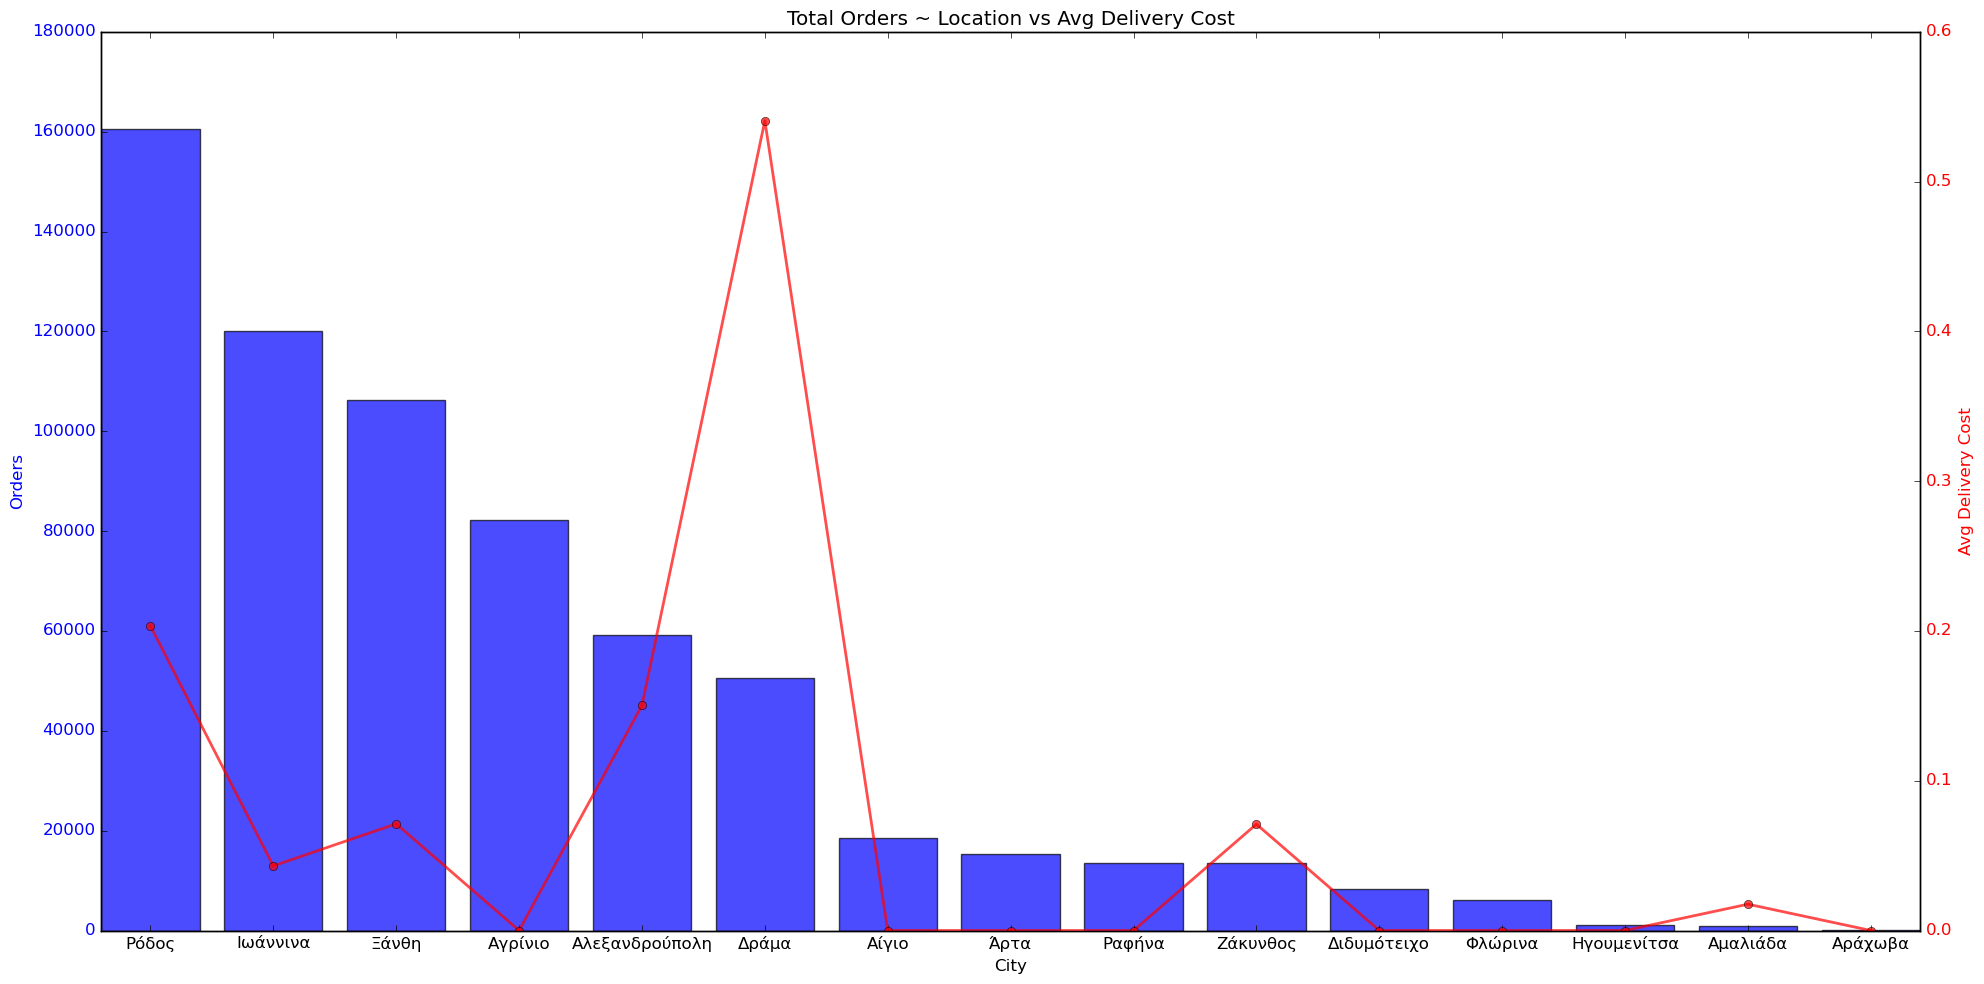

In [47]:
# function to plot the comparison between location and avg delivery cost
location_vs_delivery_costs(orders_per_city,orders_per_city_del_cost)

* Notably, cities like Ρόδος, Ιωάννινα, and Ξάνθη have relatively **high order counts**
* Αλεξανδρούπολη and Δράμα stand out with **higher delivery costs**
* A significant number of cities, such as Αγρίνιο, Αίγιο, Άρτα, and others, have **low order counts and zero delivery costs**, indicating **potential areas for cost optimization or increased customer engagement**.

> ## (6) Promotions and Discounts

In this section, our goal is to

* investigate the **impact** of order_contains_offer and coupon_discount_amount **on user behavior and revenue**
* calculate the **average discount** and its **effect on user spending**

In [48]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1


**Offer**

In [49]:
# group by offer flag
orders_having_offer = orders_eda.groupby(['order_contains_offer']).agg({'order_id':'count',\
                                                                        'user_id':'nunique',\
                                                                        'revenue':'sum'})

# preview
orders_having_offer

,order_id,user_id,revenue
order_contains_offer,,,
False,580682,95686,5680019.09
True,75527,29860,770136.64


**Discount**

In [50]:
# flag orders with discount
orders_eda['flag_discount'] = np.where(orders_eda.coupon_discount_amount>0,True,False)

# group by discount flag
orders_having_discount = orders_eda.groupby(['flag_discount']).agg({'order_id':'count',\
                                                                    'user_id':'nunique',\
                                                                    'revenue':'sum'})
# preview
orders_having_discount

,order_id,user_id,revenue
flag_discount,,,
False,639379,99333,6348469.19
True,16830,8917,101686.54


**Plot Offer vs Discount**

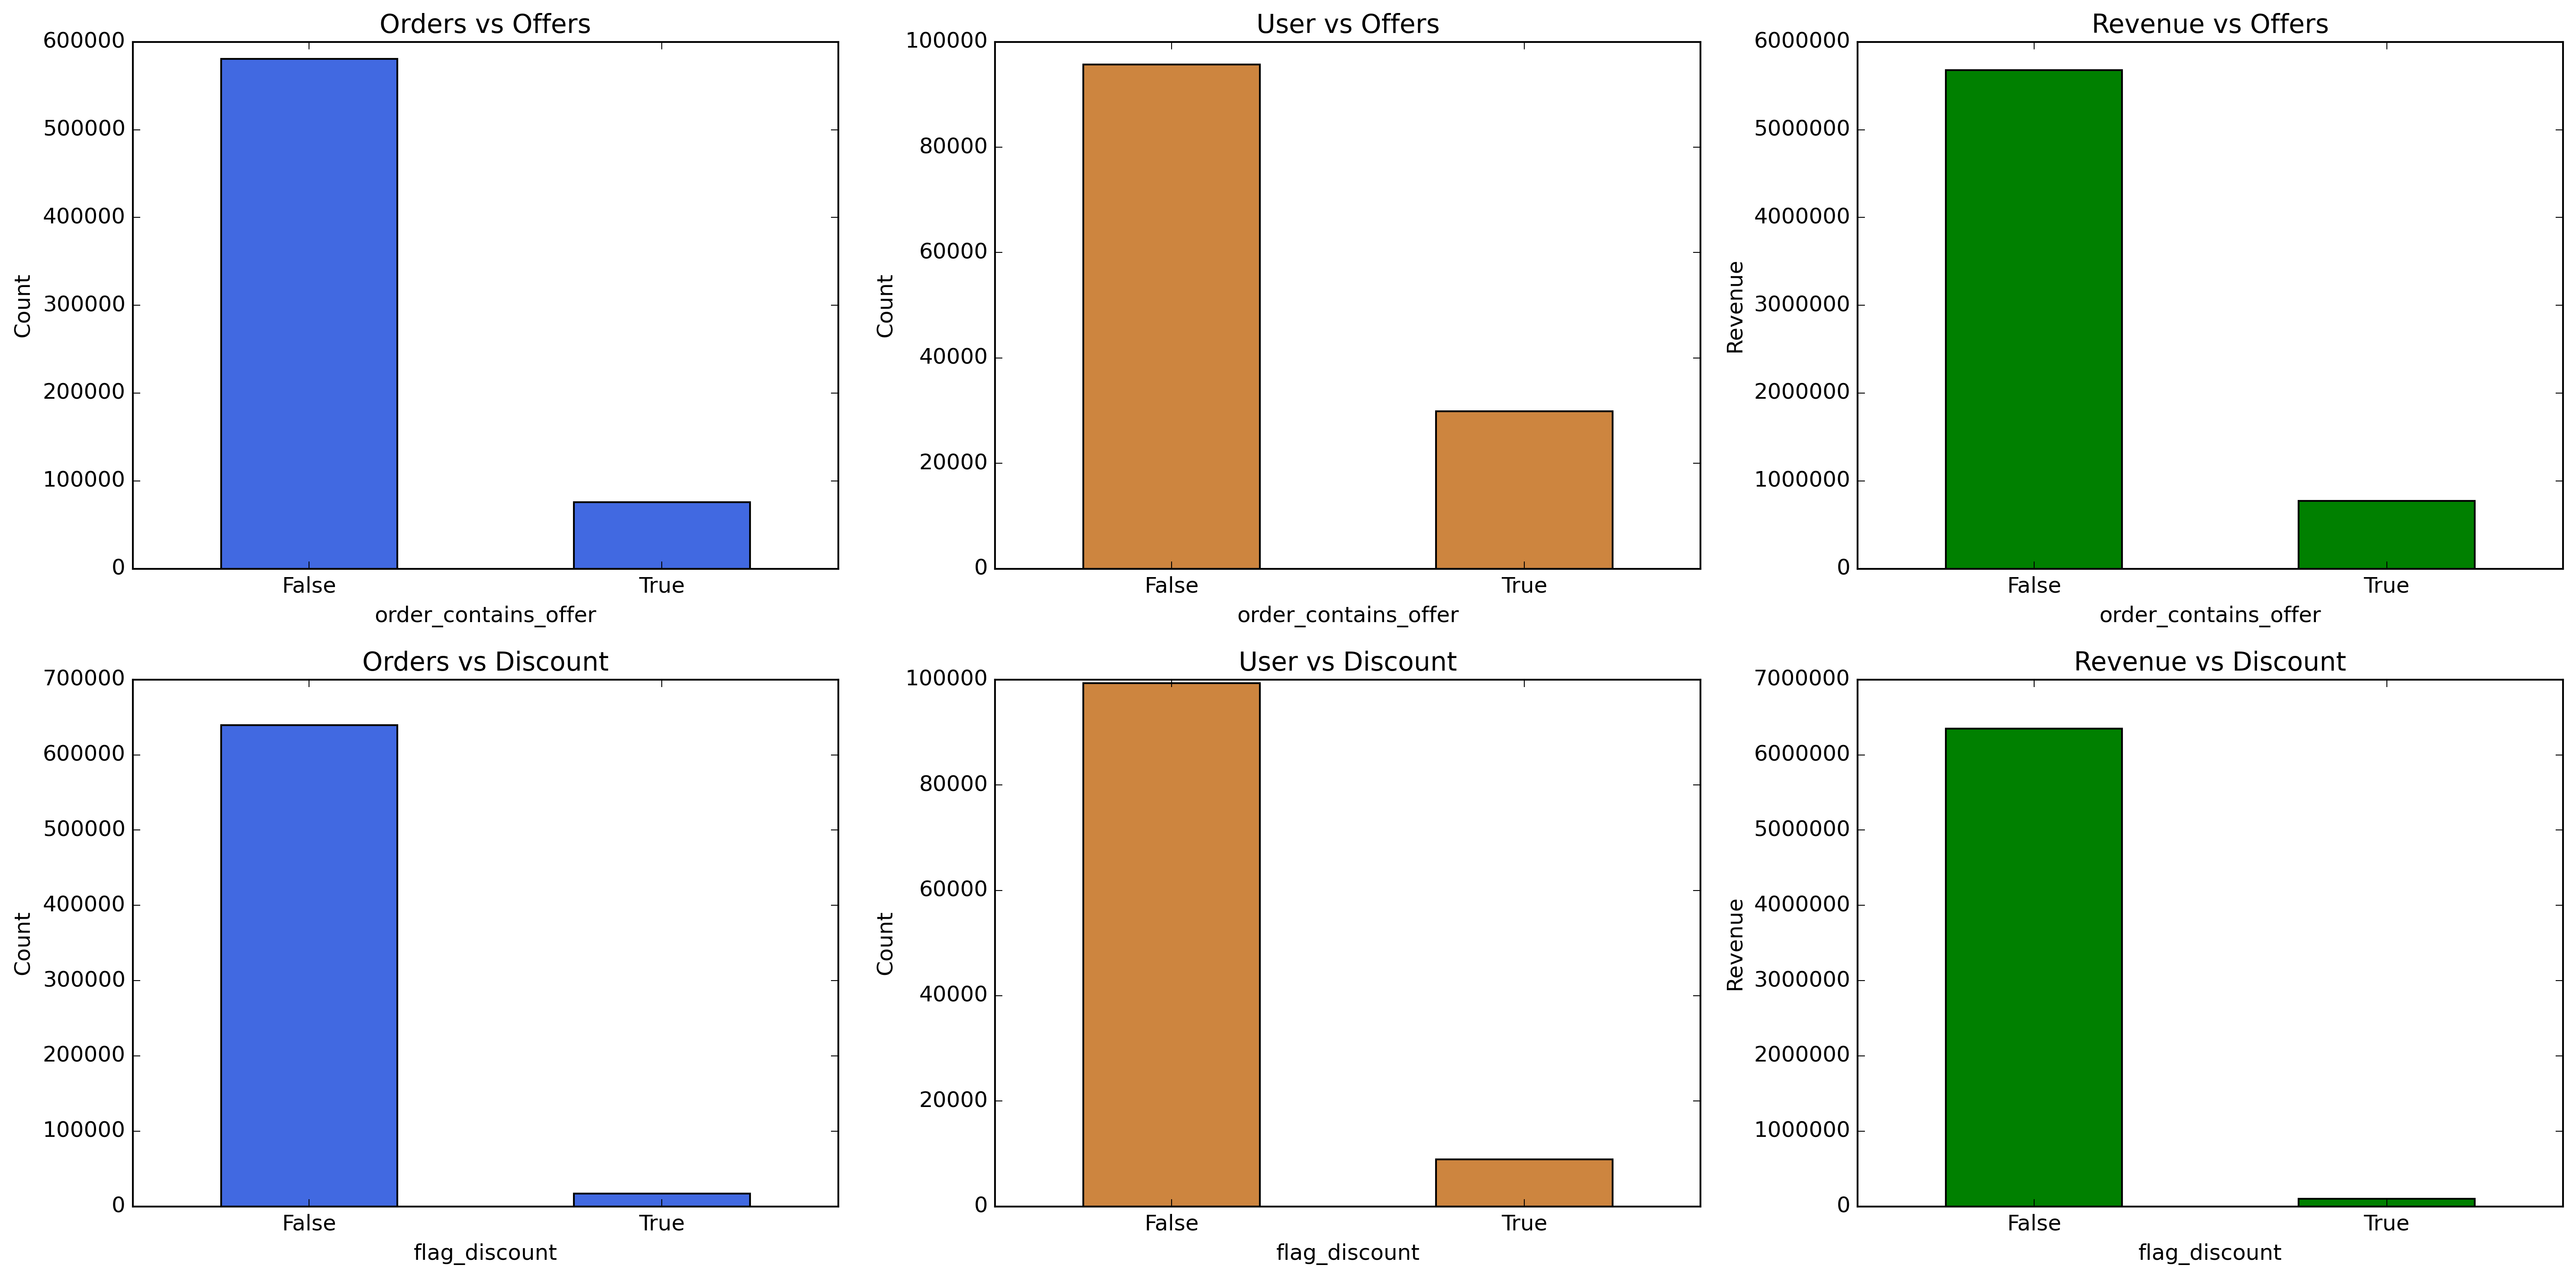

In [51]:
# function to plot and compare coupons vs discounts
compare_coupons_with_discounts(orders_having_offer,orders_having_discount)

* Regarding Offers, about 11.5% of orders **contains special offers** which means that potentially will atract more customers
* Also, ~24% of Customers **ordered having offer coupon**
* Moreover, these orders with offers, although **less in number**, **generate a higher total revenue** of 770.136,64 euros (~12% of total), indicating the **effectiveness of offering promotions to boost sales and revenue**


* Regarding Discount, about 93.5% do **not have any associated discounts**, indicating that the **majority of orders are made at regular prices**
*  Since the **percentage of orders** with discounts (3%) is **small**, they also **contribute a small part of the revenue**, with approximately 101.686,54 euros (~2% of the total), which shows the **necessity of creating/imporving strategy for more effective discounts**

**Let's now calculate the average discount and its effect on user spending**

In [52]:
# calculate the average discount per order
avg_discount_per_order = orders_eda[orders_eda['flag_discount']==True]['coupon_discount_amount'].mean()

# calculate the average user spending on orders with discounts
avg_user_spending_with_discount = orders_eda[orders_eda['flag_discount']==True]['revenue'].mean()

# calculate the average user spending on orders without discounts
avg_user_spending_without_discount = orders_eda[orders_eda['flag_discount']==False]['revenue'].mean()

# determine the effect of discounts on user spending
effect_of_discount = avg_user_spending_without_discount - avg_user_spending_with_discount

print(f'Average Discount per Order: {avg_discount_per_order:.2f} €')
print(f'Average User Spending on Orders with Discounts: {avg_user_spending_with_discount:.2f} €')
print(f'Average User Spending on Orders without Discounts: {avg_user_spending_without_discount:.2f} €')
print(f'Effect of Discounts on User Spending: {effect_of_discount:.2f} €')

Average Discount per Order: 3.10 €
Average User Spending on Orders with Discounts: 6.04 €
Average User Spending on Orders without Discounts: 9.93 €
Effect of Discounts on User Spending: 3.89 €


> ## (7) Revenue Analysis

At this point, we aim to:

* analyze how **revenue is distributed in the week** or in the **month** for both August, September
* Find **trends**
* **Compare revenue** from different **cities, user classes, and verticals**

In [53]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0,1,False
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False


* We will start by isolate info regarding **revenue**

In [54]:
# keep info related to revenue
revenue = orders_eda[['order_id','dayofmonth','revenue','month']]

# preview
revenue.head()

,order_id,dayofmonth,revenue,month
0,11624190919400,25,2.0,September
1,11609038288316,23,2.0,September
2,11398469424776,25,2.0,August
3,11566026638236,17,19.5,September
4,11572921541732,18,2.0,September


**Find Total Revenue for each Month**

In [55]:
# group by month for monthly view
revenue_monthly = orders_eda.groupby(['month']).agg({'revenue':'sum'}).reset_index()

# preview
revenue_monthly

,month,revenue
0,August,3186296.70
1,September,3263859.03


**Visualize Distribution of revenue through each month**

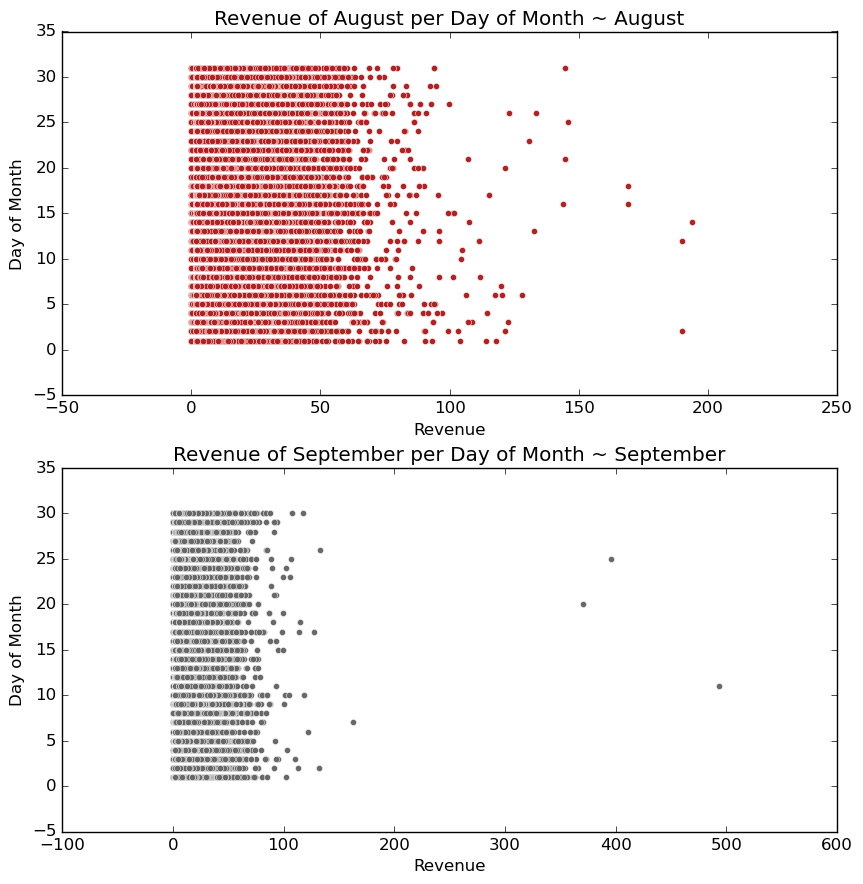

In [56]:
# scatterplot to visualize monthly distribution of revenue
monthly_distribution_of_revenue(revenue)

* Next, we will invastigate in **daily** level

**Plot time series regarding Revenue**

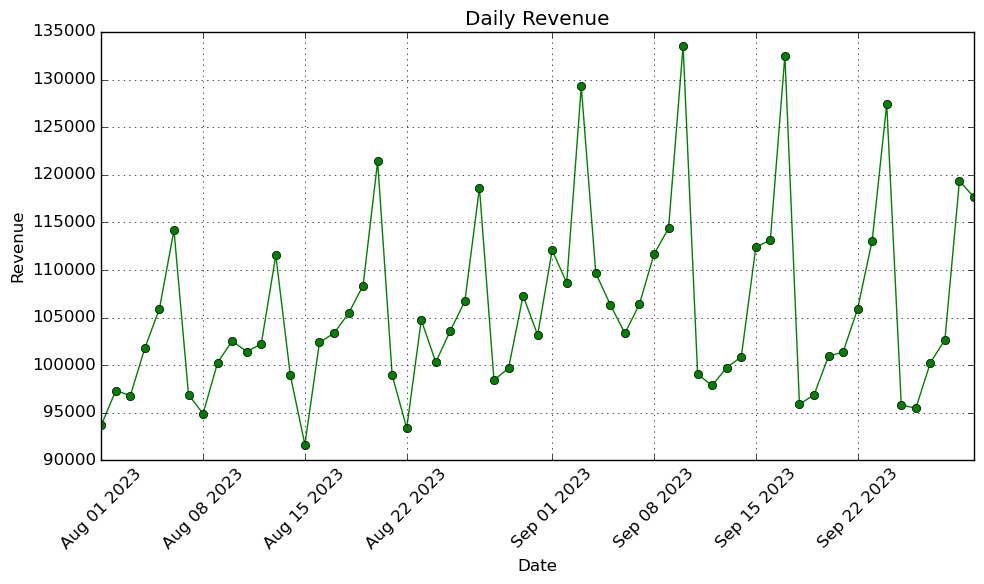

In [57]:
# group by dates for daily view
revenue_daily = orders_eda.groupby(['date']).agg({'revenue':'sum'}).reset_index()

# function to plot time series regarding revenue
time_series_revenue(revenue_daily)

* The **revenue data** for August and September 2023 **shows a consistent upward trend in daily revenue, with occasional fluctuations** 

* **Revenue gradually increased from August to September**, possibly indicating increased sales, promotions, or customer engagement 

* This upward **trend** suggests that the business has been successful in boosting its revenue over this two-month period.

**Distribution of revenue through Days of Week**

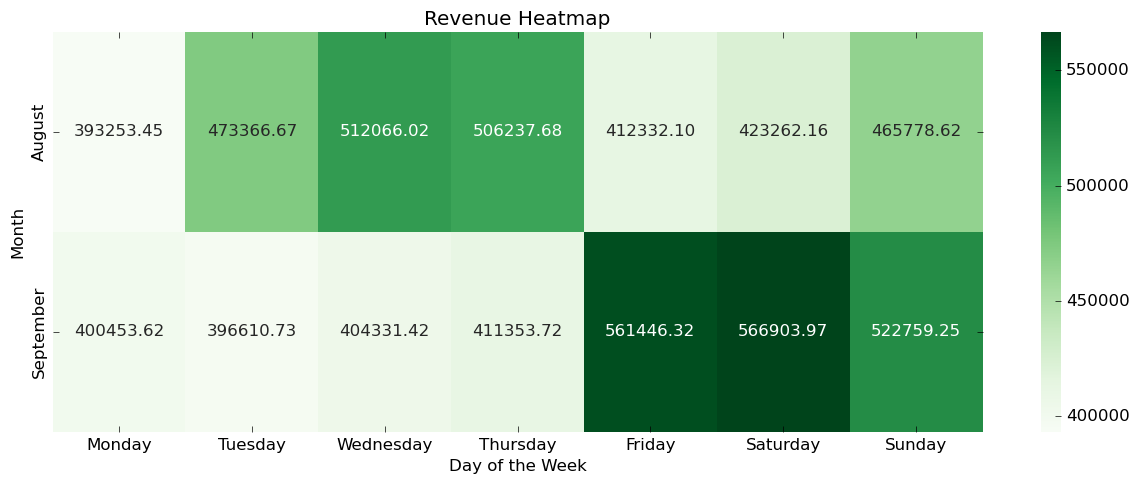

In [58]:
# group by day of week
revenue_dow = orders_eda.groupby(['month','dayofweek']).agg({'revenue':'sum'}).reset_index()

# pivot the data to prepare it for heatmap
heatmap_data = revenue_dow.pivot('month', 'dayofweek', 'revenue')

# specify the order of days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# sort the columns of the pivot_df based on the day_order
heatmap_data = heatmap_data[day_order]

# plot the weekly distribution of revenue
weekly_heatmap_revenue(heatmap_data)


* The **weekly revenue** data for August and September **shows fluctuations in daily revenue** across the days of the week. 
* Notably, on **August**, we have **peaks from Tuseday-Thursday** while in **September** our **peaks are from Friday to Sunday** which is possible **due to the end of the summer holidays and the came back in workplaces**

> ## (8) Delivery Costs

Continuing, we will:

* Find **correlated metrics**
* Investigate how **delivery cost affect orders**

In [59]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0,1,False
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False


**Find the Correlated Metrics**

* At first, we should **create dummies** regarding our categorical variables

In [60]:
# exclude non usefull columns
# order_id, user_id are ids
# for variable time, we have the hour which is the same
# for year, we have only 2023, so it will have no meaning
columns_to_exclude = ['order_id', 'user_id','time','year']

# isolate categorical variables
categorical_columns = [col for col in orders_eda.select_dtypes(include=['object', 'category']).columns if col not in columns_to_exclude]

# get dummies for categorical variables 
orders_eda_dummies = pd.get_dummies(orders_eda, columns=categorical_columns, drop_first=True)

* Then, we will get the **top 10 most correlated columns** regarding delivery cost

In [61]:
# calculate correlation with 'delivery_cost' and sort in descending order
correlation_with_delivery_cost = orders_eda_dummies.corr()['delivery_cost'].sort_values(ascending=False)

# get the top 10 most correlated columns (excluding 'delivery_cost' itself)
top_10_correlated_columns = pd.DataFrame(correlation_with_delivery_cost[1:11])

**Plot top 10 most correlated columns regarding delivery cost**

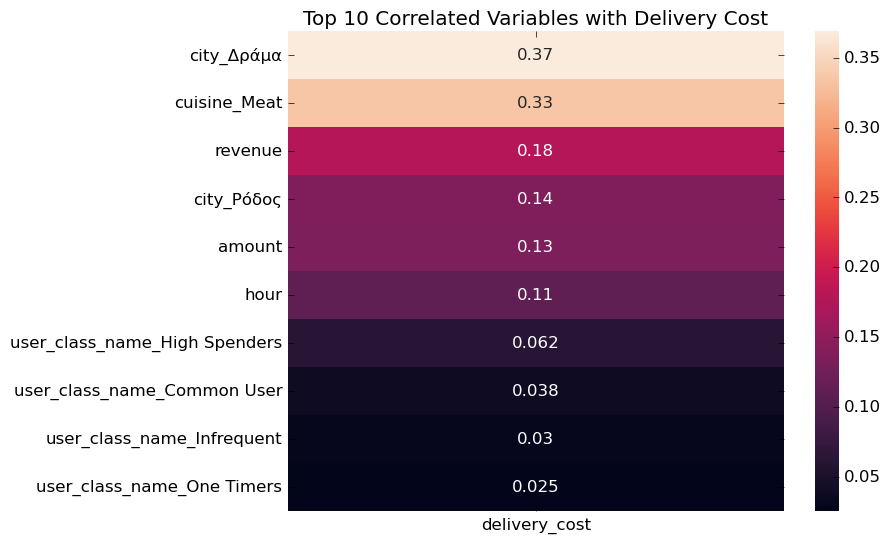

In [62]:
# function to plot top 10 correlated variables with delivery cost
top_10_related_to_delivery_cost(top_10_correlated_columns)

**Analyze Delivery Cost per class**

In [63]:
# group by class 
delivery_costs_classes = orders_eda.groupby(['user_class_name']).agg({'order_id':'count','delivery_cost':'mean'}).reset_index()

# sort values
delivery_costs_classes = delivery_costs_classes.sort_values('order_id',ascending=False)

# set class as index
delivery_costs_classes.set_index('user_class_name', inplace=True)

delivery_costs_classes

,order_id,delivery_cost
user_class_name,,
All Star,231499,0.111366
Loyal,130967,0.072719
Common User,124879,0.151364
High Spenders,69580,0.184833
Infrequent,66643,0.154690
One Timers,32641,0.162103


**Plot How Delivery Cost affect Orders per class**

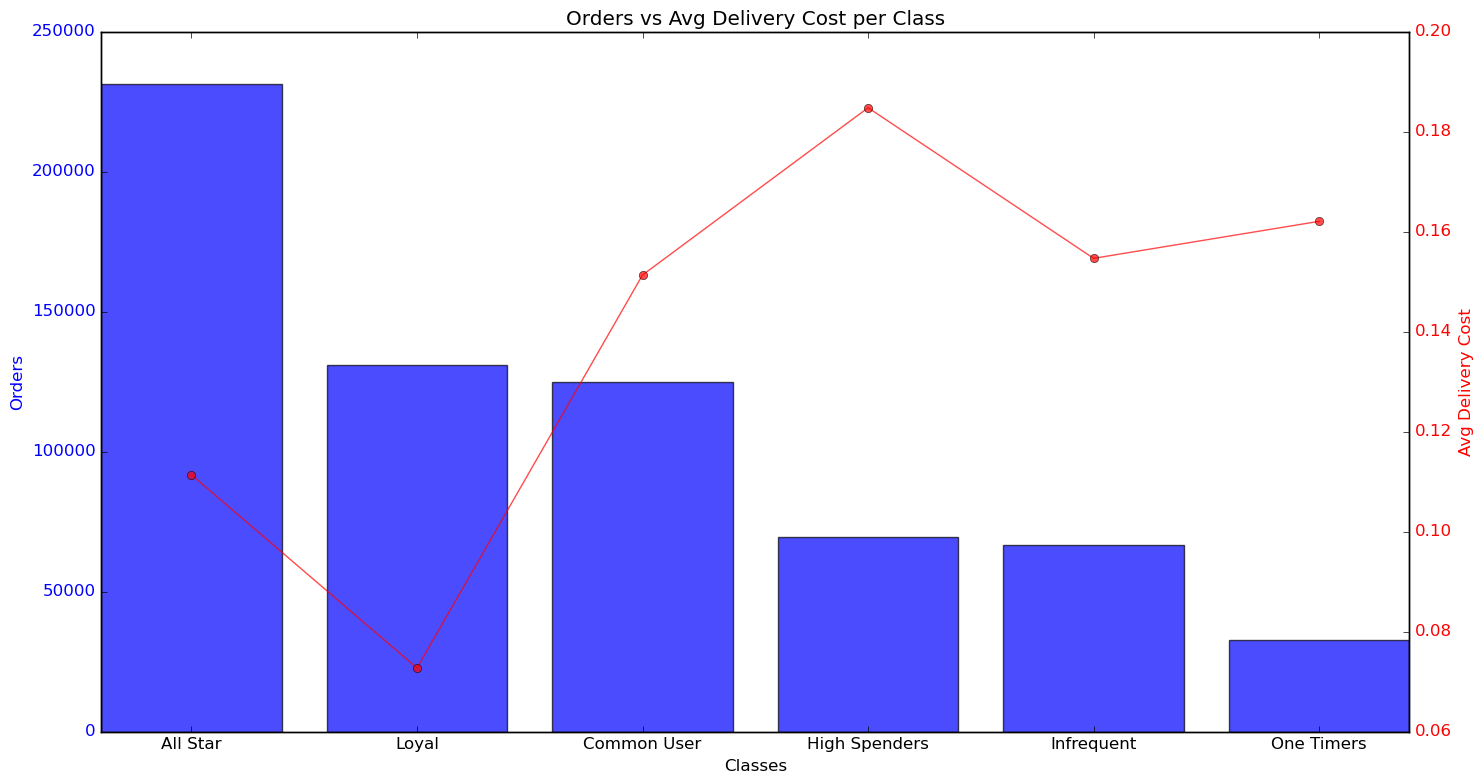

In [64]:
# function to compare delivery cost with orders per class 
delivery_cost_vs_orders_per_class(delivery_costs_classes)

> ## (9) Vertical and Cuisine Preferences

We will finish our eda analysis by trying to:
* Determine the **popularity of Restaurant vs Local Stores verticals**
* Identify the **top cuisines** that are ordered and see if there are any regional preferences

In [65]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0,1,False
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False


* We will start by **compare** Restaurants with Local Stores

In [66]:
# group by vertical
vertical = orders_eda.groupby('vertical').agg(total_orders=('order_id', 'count'),\
                                              total_users=('user_id', 'nunique'),\
                                              total_revenue=('revenue', 'sum'), \
                                              avg_revenue=('revenue', 'mean'),\
                                              avg_delivery_cost=('delivery_cost', 'mean')).reset_index()
# preview
vertical

,vertical,total_orders,total_users,total_revenue,avg_revenue,avg_delivery_cost
0,Local Stores,766,441,14354.18,18.739138,0.162794
1,Restaurant,655443,101333,6435801.55,9.819010,0.125935


* From the above table, we can see that **users prefer Restaurants** (about 99.6%), which affects the total revenue, since 99.7% comes from these orders
* Furthermore, it is observed that **orders originating from Local Stores** tend to have a **higher average delivery cost** compared to orders from Restaurants
* So, **users select Restaurants more than Local Shops** probably due to the more extensive menu and higher volume of customers, while maintaining a lower average delivery cost

* Next we will invastigate **cuisine preferences**

In [67]:
# group by class 
cuisine = orders_eda.groupby('cuisine').agg(total_orders=('order_id', 'count'),\
                                            total_users=('user_id', 'nunique'),\
                                            total_revenue=('revenue', 'sum'), \
                                            avg_revenue=('revenue', 'mean'),\
                                            avg_delivery_cost=('delivery_cost', 'mean'))


# sort values
cuisine = cuisine.sort_values('total_orders',ascending=False)

# preview
cuisine

,total_orders,total_users,total_revenue,avg_revenue,avg_delivery_cost
cuisine,,,,,
Breakfast,287474,51067,1661442.42,5.779453,0.025818
Meat,197875,61109,2293167.13,11.588968,0.291629
Italian,90597,41386,1362575.98,15.039968,0.095848
Street food,79497,32980,1118616.02,14.071173,0.109839
Local Stores,766,441,14354.18,18.739138,0.162794


**Plot Total Orders & Total users per Cuisine Prefernce**

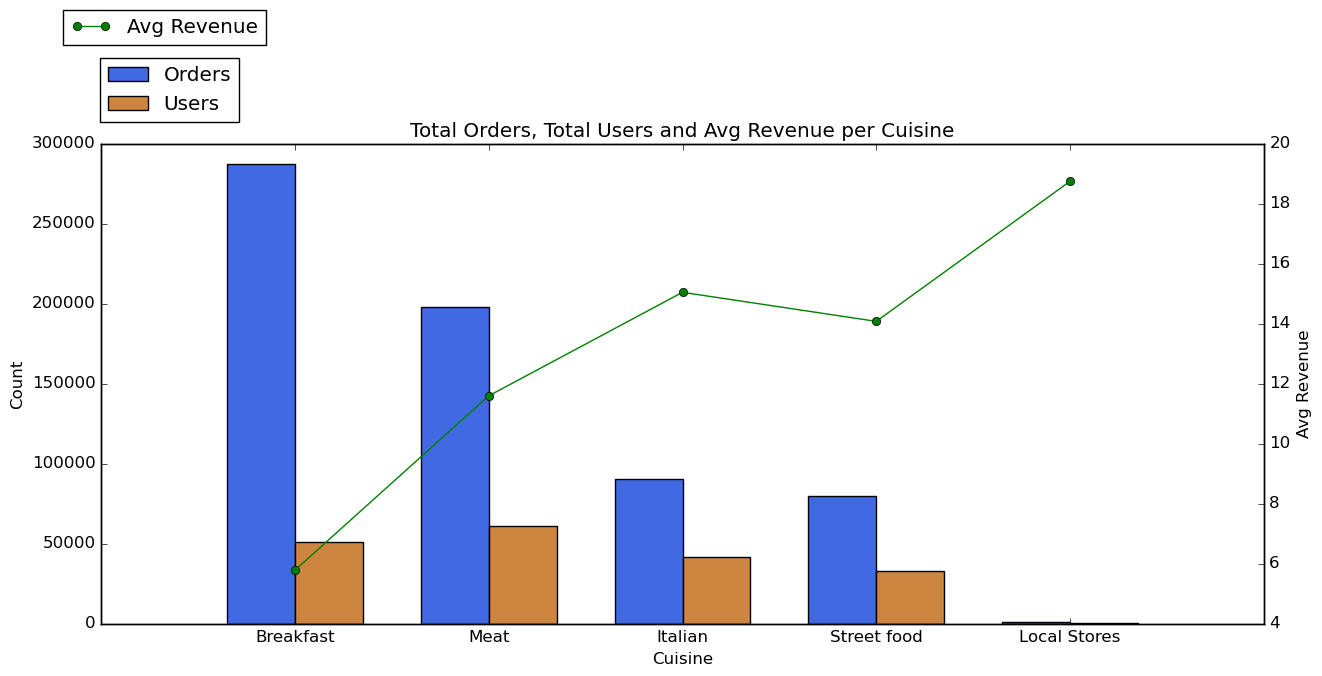

In [68]:
# function to plot cuisine preferencies compared to revenue
cuisine_preference_vs_revenue(cuisine)

* Let's find out how orders are **distributed hourly per Cuisine**

In [69]:
# group by cuisine and by hour 
cuisine = orders_eda.groupby(['hour','cuisine']).agg(total_orders=('order_id', 'count'))

# preview
cuisine.head()

total_orders
hour cuisine                  
0    Breakfast            1328
     Italian              2791
     Meat                 5622
     Street food          2453
1    Breakfast            1510

**Plot the hourly distribution of Orders per Cousine**

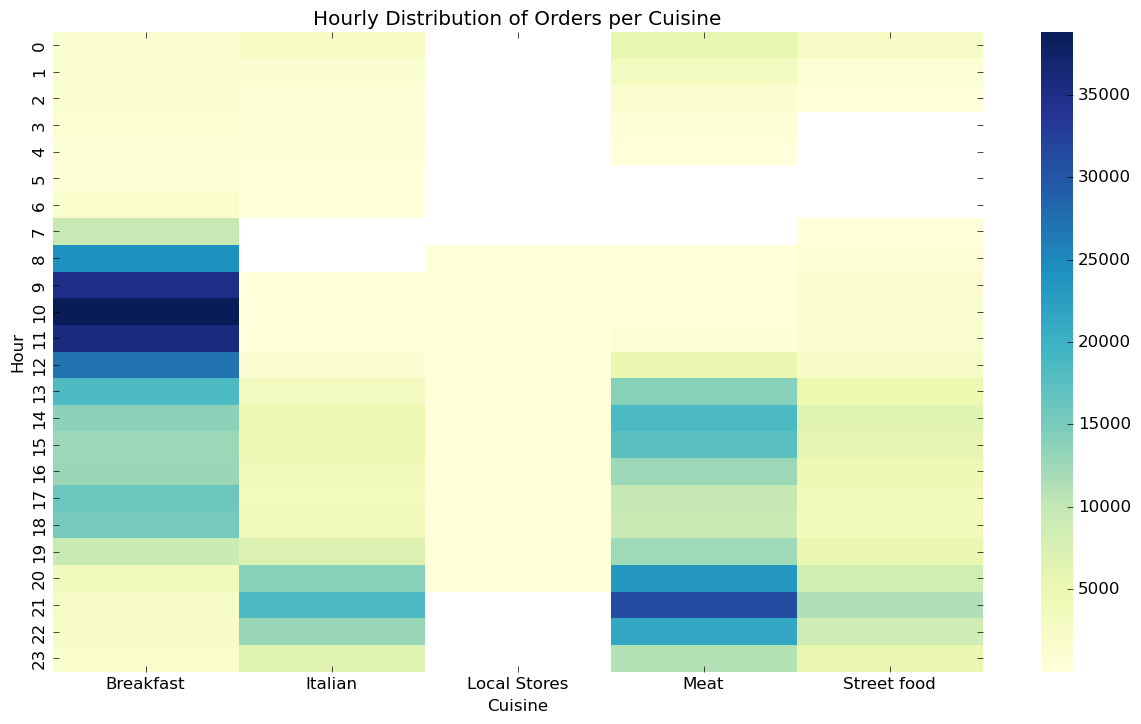

In [70]:
# Define row and column labelszz
hours = list(cuisine.index.levels[0])
cuisines = list(cuisine.index.levels[1])

# Reshape the DataFrame for the heatmap
data_heatmap = cuisine.unstack(level='cuisine')['total_orders']

# heatmap to describe the hourly distribution of orders per cousine
hourly_distribution_of_orders_per_cuisine(data_heatmap,hours,cuisines)

* From the above heat map, we can see that the **peak times for breakfast are in the morning**, while for **meat it is from midday onwards**.
* Furthermore, given the limited number of orders in the early morning hours and the increased number of orders from the afternoon onwards, we can adjust our staffing plans accordingly

> ## How to target users who are dedicated to Breakfast cuisine in an upcoming coupon campaign?

Our goal is to **target** somehow the users who are dedicated to **Breakfast cuisine** in order to use them in an upcoming coupon campaign

* We will begin segmenting our user data to identify groups of users who are more likely to be interested in breakfast cuisine
* For that porpuses, we will create the following user segments:

     * Segment_1 -> **Frequent Breakfast Customers**: users who have a history of **placing breakfast orders regularly**
     
     * Segment_2 ->**High Breakfast Spending Users**: users who **spend a significant amount of money** on breakfast orders.
     
     * Segment_3 -> **Recent Breakfast Orders**: users who have **placed breakfast orders recently**, as they may be more inclined to order breakfast again.

Let's isolate our data and **keep** only orders related to **breakfast cuisine**

In [71]:
orders_eda.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07+00:00,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0,19.5,2023-09-17,2023,September,17,14:09:07,14,Sunday,37,True,1,0,1,False
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False


In [72]:
# keep orders related to breakfast cuisine
breakfast = orders_eda[orders_eda.cuisine=='Breakfast']

# preview
breakfast.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False
5,11586173047628,555845617152,Loyal,2023-09-20 10:40:07+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-20,2023,September,20,10:40:07,10,Wednesday,38,False,1,0,1,False


* **Statistics** and info of breakfast data

In [73]:
# print number of rows in DF
print(f'Rows: {breakfast.shape[0]} \n')

# print number of features in DF
print(f'Features: {breakfast.shape[1]} \n')

# print total number of missing values
print(f'Missing Values: {breakfast.isnull().values.sum()} \n')

# print number of unique values per feature location
print(f'Unique Values:\n{breakfast.nunique()} \n')

Rows: 287474 

Features: 27 

Missing Values: 0 

Unique Values:
order_id                  287474
user_id                    51067
user_class_name                6
order_timestamp           272151
city                          13
vertical                       1
cuisine                        1
device                         4
paid_cash                      2
order_contains_offer           2
coupon_discount_amount       213
amount                      1146
delivery_cost                  7
revenue                     1535
date                          61
year                           1
month                          2
dayofmonth                    31
time                       59587
hour                          24
dayofweek                      7
week                           9
flag_weekend                   2
paid_online                    2
paid_cash_v2                   2
flag_repeaters                 2
flag_discount                  2
dtype: int64 



In [74]:
print(f'The total revenue is {round(breakfast.revenue.sum(),0)} euros')

The total revenue is 1661442.0 euros


In [75]:
breakfast.describe().T

,count,mean,std,min,25%,50%,75%,max
coupon_discount_amount,287474.0,0.062961,0.412024,0.0,0.0,0.0,0.0,15.7
amount,287474.0,5.816596,3.924267,0.0,3.4,4.9,7.2,79.2
delivery_cost,287474.0,0.025818,0.130966,0.0,0.0,0.0,0.0,1.0
revenue,287474.0,5.779453,3.968141,0.0,3.3,4.9,7.2,79.2
year,287474.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
dayofmonth,287474.0,15.643902,8.817832,1.0,8.0,16.0,23.0,31.0
hour,287474.0,12.092948,3.969294,0.0,9.0,11.0,15.0,23.0
week,287474.0,34.989881,2.488701,31.0,33.0,35.0,37.0,39.0
paid_online,287474.0,0.480913,0.499636,0.0,0.0,0.0,1.0,1.0
paid_cash_v2,287474.0,0.519087,0.499636,0.0,0.0,1.0,1.0,1.0


In [76]:
breakfast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287474 entries, 0 to 656202
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   order_id                287474 non-null  object             
 1   user_id                 287474 non-null  object             
 2   user_class_name         287474 non-null  object             
 3   order_timestamp         287474 non-null  datetime64[ns, UTC]
 4   city                    287474 non-null  object             
 5   vertical                287474 non-null  object             
 6   cuisine                 287474 non-null  object             
 7   device                  287474 non-null  object             
 8   paid_cash               287474 non-null  bool               
 9   order_contains_offer    287474 non-null  bool               
 10  coupon_discount_amount  287474 non-null  float64            
 11  amount                  28

**Print some totals**

In [77]:
# find the total number of orders 
total_orders = len(breakfast.order_id)

# find the total number of unique users
num_of_unique_users = len(breakfast.user_id.unique())

# calculate the number of orders in each Class
number_of_orders_per_class = breakfast.user_class_name.value_counts()

# group by class
grouped_by_class = breakfast.user_id.groupby(breakfast.user_class_name)
number_of_unique_users_per_class = grouped_by_class.nunique()

print(f'In our data we have:\n\nTotal Number of Orders: {total_orders}\
                            \nTotal Number of Users: {num_of_unique_users}\
                            \n\nTotal Orders per Class:\n{number_of_orders_per_class}\
                            \n\nTotal Users in each Class:\n{number_of_unique_users_per_class}')

In our data we have:

Total Number of Orders: 287474                            
Total Number of Users: 51067                            

Total Orders per Class:
All Star         122115
Loyal             83605
Common User       39285
Infrequent        18683
High Spenders     16717
One Timers         7069
Name: user_class_name, dtype: int64                            

Total Users in each Class:
user_class_name
All Star          9752
Common User      16112
High Spenders     5679
Infrequent       12168
Loyal            11372
One Timers        6812
Name: user_id, dtype: int64


* Continuing, we will **start the creation of our segments**

**Frequent Breakfast Customers**

* In order to **identify users** who have a **history of placing breakfast orders regularly** we should **define a threshold** regarding the frequency of their breakfast orders.
* Let's **find that threshold**

In [78]:
# group by user id and month 
user_orders_per_month = orders_eda.groupby(['user_id','month']).agg(total_orders=('order_id', 'count'))

# compute average monthly user orders
avg_monthly_user_orders = round(user_orders_per_month.mean()[0],0)

# compute max times a user ordered in a month
max_monthly_user_orders = user_orders_per_month.max()[0]

print(f'The average number of orders a user place in one month is: {avg_monthly_user_orders}')
print(f'The max number of times a user ordered in one month is: {max_monthly_user_orders}')

The average number of orders a user place in one month is: 4.0
The max number of times a user ordered in one month is: 114


* So, let's say that in this category there will be **users who order breakfast at least `15` times per month**
* Next, we will flag those users

In [79]:
# reset index
user_orders_per_month.reset_index(inplace=True)

# isolate users who have ordered min 30 times in a month
frequent_breakfast_users = user_orders_per_month[user_orders_per_month.total_orders>=15]['user_id'].unique().tolist()

# create flag in main dataframe
breakfast['frequent_breakfast_users'] = np.where(breakfast.user_id.isin(frequent_breakfast_users),1,0)

**High Breakfast Spending Users**
* In order to identify **users who spend a significant amount of money on breakfast** orders we should **define a threshold** regarding the amount of their breakfast spending.
* Let's **find that threshold**

In [80]:
# group by user id and month 
user_spending_per_order = orders_eda.groupby(['user_id','order_id']).agg(revenue=('revenue', 'mean'))

# compute average monthly user spendings
avg_monthly_user_spending = round(user_spending_per_order.mean()[0],0)

# compute max money a user spend in a order monthly
max_monthly_user_spending = round(user_spending_per_order.max()[0],0)

print(f'The average user spending per order is: {avg_monthly_user_spending}')
print(f'The max nuber user spending per order is: {max_monthly_user_spending}')

The average user spending per order is: 10.0
The max nuber user spending per order is: 494.0


* So, let's say that in this category there will be **users who spend at least `25` euros in their breakfast order**
* Next, we will flag those users

In [81]:
# reset index
user_spending_per_order.reset_index(inplace=True)

# isolate users who have spend at minimun 35 euros in their breakfast order
high_breakfast_spending_users = user_spending_per_order[user_spending_per_order.revenue>=25]['user_id'].unique().tolist()

# create flag in main dataframe
breakfast['high_breakfast_spending_users'] = np.where(breakfast.user_id.isin(high_breakfast_spending_users),1,0)

**Recent Breakfast Orders**

* Next, we should **identify users who have placed breakfast orders recently**
* We will **include only users who have placed an order in the `last week`**

In [82]:
# group by user id and month 
recent_breakfast_order_weekly = orders_eda.groupby(['user_id','week']).agg(total_orders=('order_id', 'count')).reset_index()

# sort values on descending order
recent_breakfast_order_weekly = recent_breakfast_order_weekly.sort_values('week',ascending=False)

# isolate users who have spend at minimun 35 euros in their breakfast order
recent_breakfast_order_users = recent_breakfast_order_weekly[recent_breakfast_order_weekly.week==39]['user_id']\
                                                                                                    .unique().tolist()


# create flag in main dataframe
breakfast['recent_breakfast_order_users'] = np.where(breakfast.user_id.isin(recent_breakfast_order_users),1,0)

**Finally, let's see how many users each segment has**

In [83]:
breakfast.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False,0,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False,0,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True,0,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False,0,0,1
5,11586173047628,555845617152,Loyal,2023-09-20 10:40:07+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-20,2023,September,20,10:40:07,10,Wednesday,38,False,1,0,1,False,0,0,1


In [84]:
# find how many users each segment has 
segment_1 = len(breakfast[breakfast.frequent_breakfast_users==1]['user_id'].unique().tolist())
segment_2 = len(breakfast[breakfast.high_breakfast_spending_users==1]['user_id'].unique().tolist())
segment_3 = len(breakfast[breakfast.recent_breakfast_order_users==1]['user_id'].unique().tolist())
total_users = len(breakfast['user_id'].unique().tolist())

# percentage comapre to the total number of users
segment_1_per = round((segment_1/total_users)*100,0)
segment_2_per = round((segment_2/total_users)*100,0)
segment_3_per = round((segment_3/total_users)*100,0)

print(f'The segment Frequent Breakfast Customers has the {segment_1_per} % of all the users')
print(f'The segment High Breakfast Spending Users has the {segment_2_per} % of all the users')
print(f'The segment Recent Breakfast Orders has the {segment_3_per} % of all the users')

The segment Frequent Breakfast Customers has the 12.0 % of all the users
The segment High Breakfast Spending Users has the 15.0 % of all the users
The segment Recent Breakfast Orders has the 41.0 % of all the users


* Since we have create our segments, we will **analyze the behavior** and characteristics of **users within each segment**.
* We will look for **patterns** such as:

    1. Order frequency
    2. Average order spendings for breakfast
    3. Compare repeaters
    4. Location of orders
    5. Any previous engagements with discounts or coupon


> ## (1) Order frequency

In [85]:
breakfast.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False,0,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False,0,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True,0,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False,0,0,1
5,11586173047628,555845617152,Loyal,2023-09-20 10:40:07+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-20,2023,September,20,10:40:07,10,Wednesday,38,False,1,0,1,False,0,0,1


**Monthly**

In [86]:
# group by month
order_freq_month = breakfast.groupby(['month']).agg(frequent_breakfast_users=('frequent_breakfast_users','sum'),\
                                                    high_breakfast_spending_users=('high_breakfast_spending_users','sum'),\
                                                    recent_breakfast_order_users=('recent_breakfast_order_users','sum'))

# preview
order_freq_month

,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
month,,,
August,67792,29490,88991
September,68973,27672,108231


* **Frequent breakfast** users steadily **increased** from August to September, indicating a growing user base
* **High breakfast spending users** remained relatively **stable** between the two months
* **Recent breakfast order users** showed a significant **increase** in September, suggesting increased user activity and engagement

**Weekly**

In [87]:
# group by days of week
order_freq_dow = breakfast.groupby(['dayofweek']).agg(frequent_breakfast_users=('frequent_breakfast_users','sum'),\
                                                            high_breakfast_spending_users=('high_breakfast_spending_users','sum'),\
                                                            recent_breakfast_order_users=('recent_breakfast_order_users','sum'))

# specify the order of days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# sort the rows in the pivot table based on day_order
order_freq_dow = order_freq_dow.reindex(day_order)

# preview
order_freq_dow

,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
dayofweek,,,
Monday,18202,7325,25993
Tuesday,20160,8225,28600
Wednesday,20665,8284,29194
Thursday,21039,8250,29744
Friday,21083,8558,30296
Saturday,19412,8558,29190
Sunday,16204,7962,24205


* Mondays have the **lowest number** of frequent breakfast users, high breakfast spending users, and recent breakfast order users **among the weekdays**
* Weekends, particularly Saturdays and Sundays, exhibit **lower activity compared to weekdays**, with the least recent breakfast order users on Sundays
* The **highest user activity** occurs **on Thursdays and Fridays**, with the most recent breakfast order users on Fridays

**Hourly**

In [88]:
# group by hours
order_freq_hour = breakfast.groupby(['hour']).agg(frequent_breakfast_users=('frequent_breakfast_users','sum'),\
                                                  high_breakfast_spending_users=('high_breakfast_spending_users','sum'),\
                                                  recent_breakfast_order_users=('recent_breakfast_order_users','sum'))

# preview
order_freq_hour.head()

,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
hour,,,
0,536,266,825
1,596,306,914
2,530,308,867
3,402,195,601
4,312,183,479


* All segments prefer morning hours for breakfast orders, with a peak in activity between 8 AM and 11 AM.
* **Frequent breakfast users** and **high breakfast spending users** show similar trends during the morning hours, 6 AM to 11 AM. More specifically:
    * both segments have a significant spike in user activity at 8 AM, indicating a preference for breakfast orders during this time
    * the peak hours for both segments are 9 AM to 11 AM, with the highest user activity occurring during this time frame.
* **Recent breakfast order users** exhibit a preference for ordering breakfast slightly later in the morning compared to the other two segments.
* **High breakfast spending users** have relatively consistent activity levels throughout the day, suggesting that they may be a more reliable customer segment throughout the day

**Plot the Distribution of Orders per Segment in Monthly, Weekly and Hourly level**

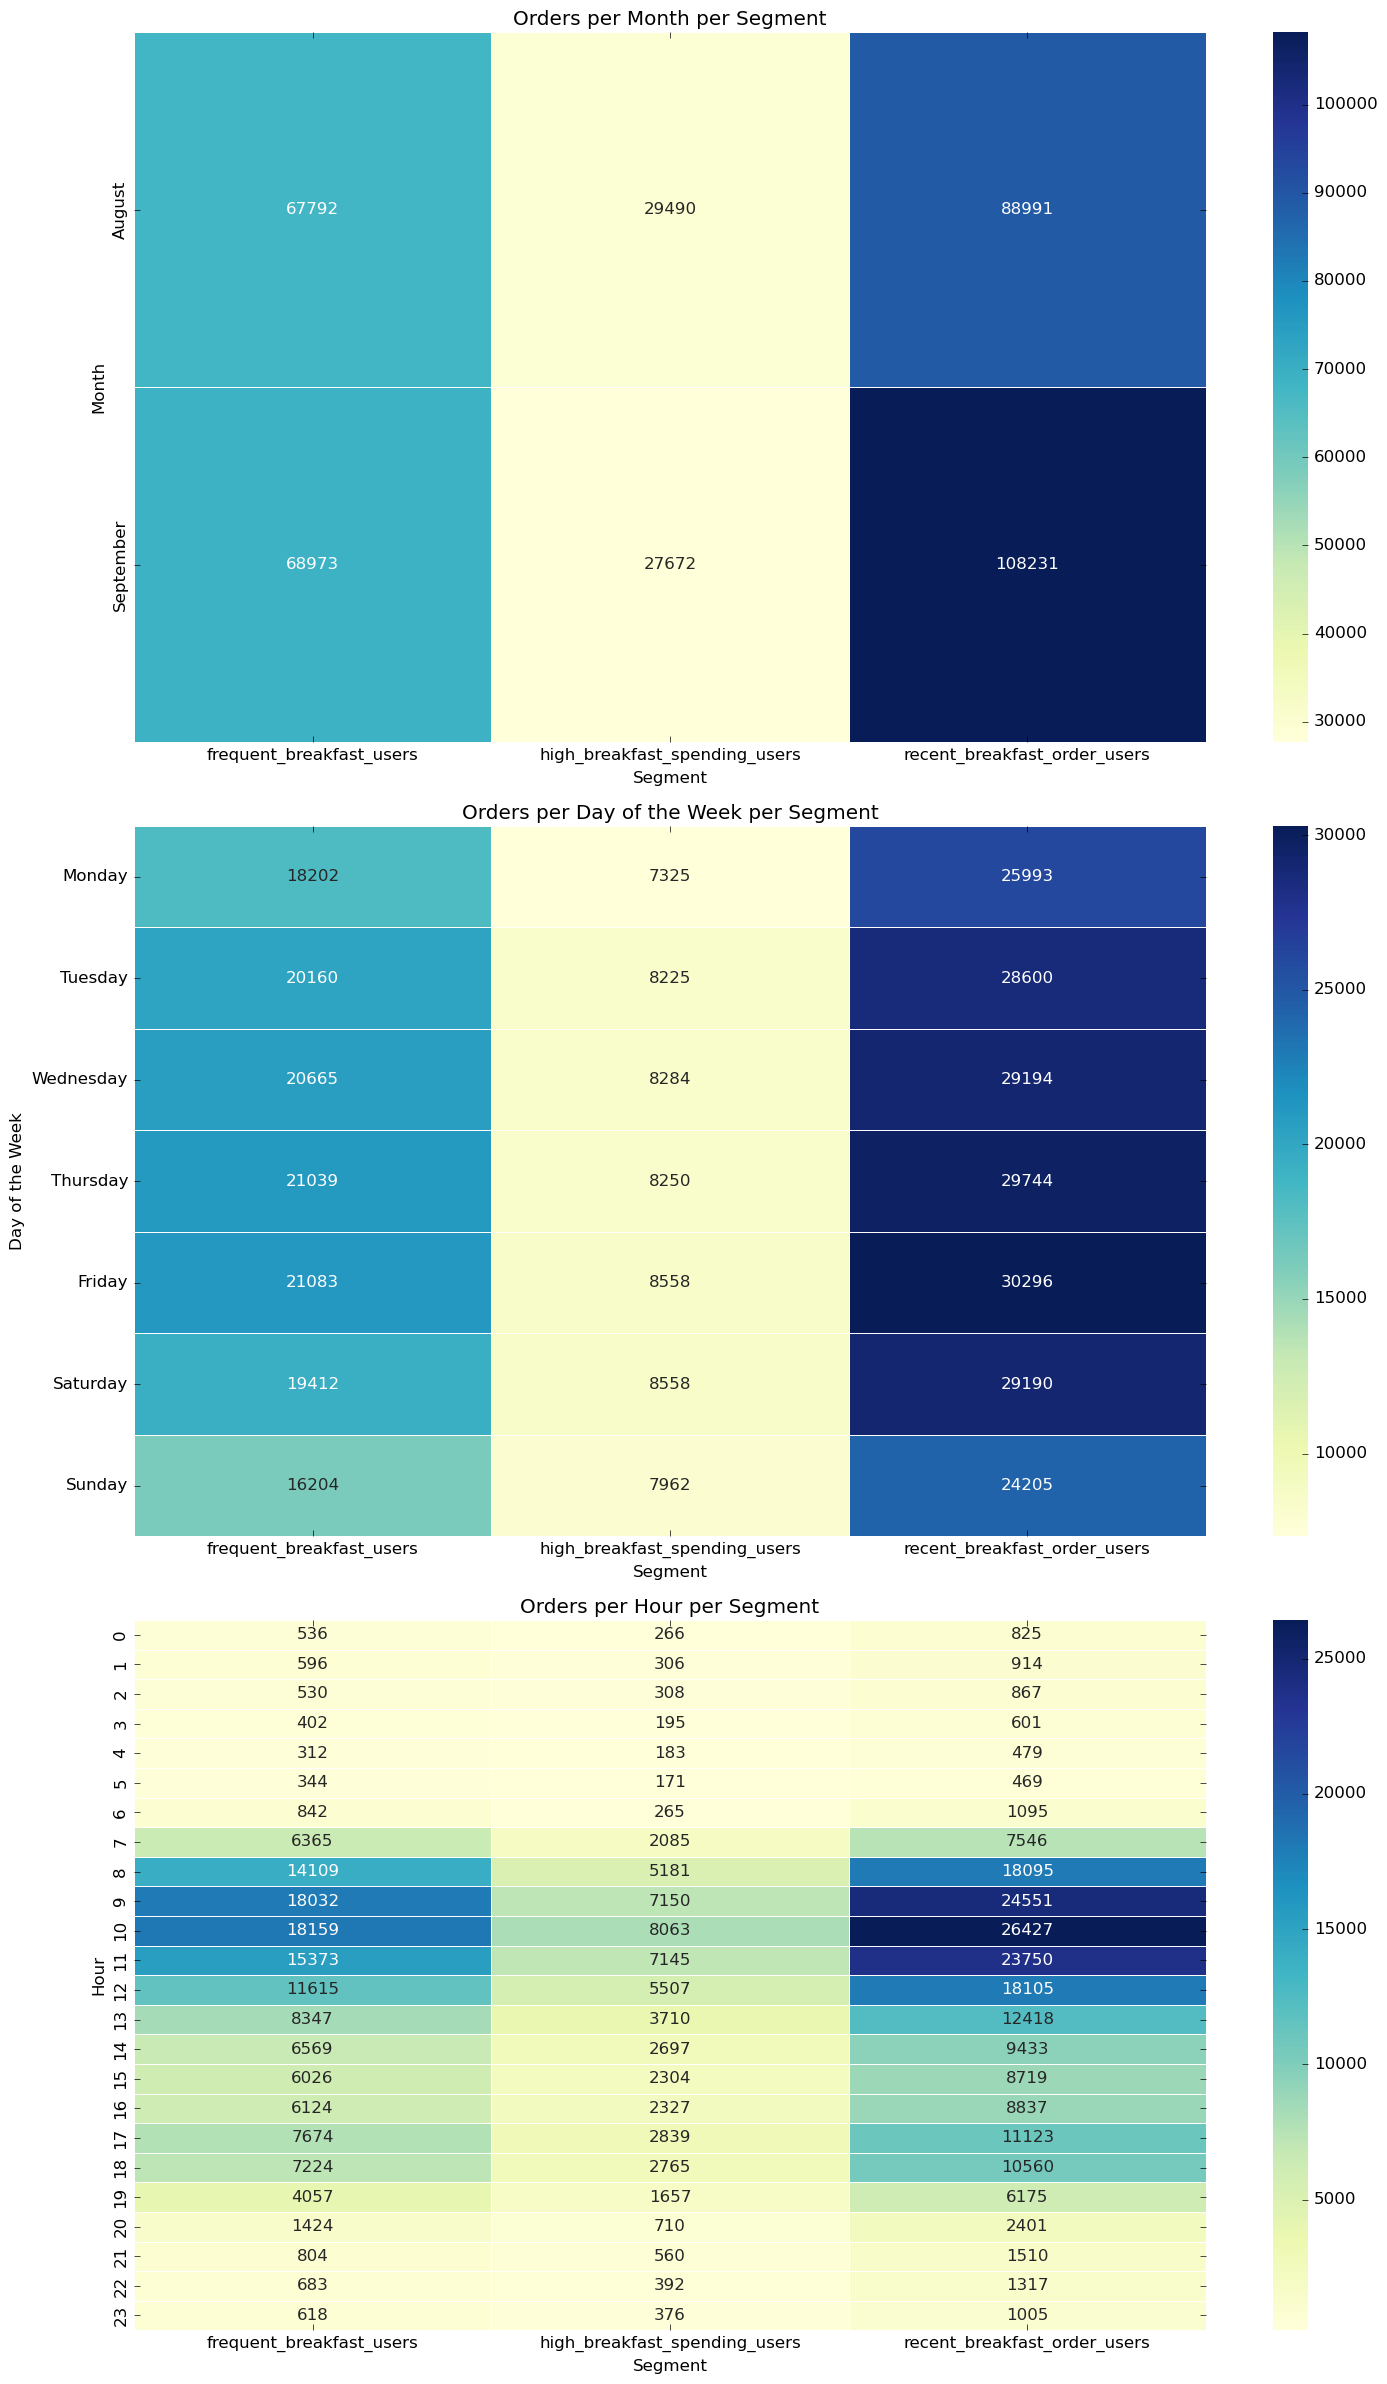

In [89]:
# function to plot the distribution of orders
distribution_of_orders_per_segment(order_freq_month,order_freq_dow,order_freq_hour)

> ## (2) Average order spendings for breakfast

In [90]:
breakfast.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False,0,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False,0,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True,0,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False,0,0,1
5,11586173047628,555845617152,Loyal,2023-09-20 10:40:07+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-20,2023,September,20,10:40:07,10,Wednesday,38,False,1,0,1,False,0,0,1


**Find the average order spendings for breakfast**

In [91]:
#create dfs for each segment 

# segment 1
df_frequent_breakfast_users = breakfast[breakfast.frequent_breakfast_users==1]
# segment 2
df_high_breakfast_spending_users = breakfast[breakfast.high_breakfast_spending_users==1]
# segment 3
df_recent_breakfast_order_users = breakfast[breakfast.recent_breakfast_order_users==1]

In [92]:
# group dfs per month 

# segment 1
frequent_breakfast_users_revenue = df_frequent_breakfast_users.groupby(['month']).\
                                                               agg(avg_revenue_segment_1=('revenue','mean'))
# segment 2
high_breakfast_spending_users_revenue = df_high_breakfast_spending_users.groupby(['month']).\
                                                               agg(avg_revenue_segment_2=('revenue','mean'))
# segment 3
recent_breakfast_order_users_revenue = df_recent_breakfast_order_users.groupby(['month']).\
                                                               agg(avg_revenue_segment_3=('revenue','mean'))

# merge dfs in a final df
revenue_segments = pd.merge(frequent_breakfast_users_revenue.reset_index(), \
                            high_breakfast_spending_users_revenue.reset_index(), on='month')
revenue_segments = pd.merge(revenue_segments, recent_breakfast_order_users_revenue.reset_index(), on='month')

# set month as index
revenue_segments.set_index('month',inplace=True)

# preview
revenue_segments

,avg_revenue_segment_1,avg_revenue_segment_2,avg_revenue_segment_3
month,,,
August,5.129803,7.726059,5.524319
September,4.990349,7.414513,5.447211


In [93]:
'frequent_breakfast_users', 'high_breakfast_spending_users', 'recent_breakfast_order_users'

('frequent_breakfast_users',
 'high_breakfast_spending_users',
 'recent_breakfast_order_users')

* In both months, high breakfast spending users have the **highest average revenue per user**, indicating that users in this segment tend to **spend more on average compared to the other segments**.
* Also, high breakfast spending users  consistently outperforms the other segments in both months. This segment might represent **high-value or premium users who contribute significantly to revenue**.
* Retention and Expansion: Identifying ways to retain and expand the user base in high breakfast spending users can be a strategic goal, as this segment has shown a **strong spending propensity**.

> ## (3) Segments vs Repeaters

In [94]:
breakfast.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False,0,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False,0,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True,0,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False,0,0,1
5,11586173047628,555845617152,Loyal,2023-09-20 10:40:07+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-20,2023,September,20,10:40:07,10,Wednesday,38,False,1,0,1,False,0,0,1


**Total Revenue of repeaters per segment**

In [95]:
# isolate repeaters of each segment

# segment 1
repeaters_breakfast_segment_1 = breakfast[(breakfast.flag_repeaters==1) &\
                                         (breakfast.frequent_breakfast_users==1)]

# segment 2
repeaters_breakfast_segment_2 = breakfast[(breakfast.high_breakfast_spending_users==1) &\
                                         (breakfast.high_breakfast_spending_users==1)]

# segment 3
repeaters_breakfast_segment_3 = breakfast[(breakfast.flag_repeaters==1) &\
                                         (breakfast.recent_breakfast_order_users==1)]


In [96]:
# group dfs per month 

# segment 1
segment1_repeaters = repeaters_breakfast_segment_1.groupby(['month']).\
                                                               agg(repeaters_segment_1=('user_id','nunique'))
# segment 2
segment2_repeaters = repeaters_breakfast_segment_2.groupby(['month']).\
                                                               agg(repeaters_segment_2=('user_id','nunique'))
# segment 3
segment3_repeaters = repeaters_breakfast_segment_3.groupby(['month']).\
                                                               agg(repeaters_segment_3=('user_id','nunique'))

In [97]:
# merge dfs in one df
segments_repeaters = pd.merge(segment1_repeaters.reset_index(), \
                            segment2_repeaters.reset_index(), on='month')
segments_repeaters = pd.merge(segments_repeaters, segment3_repeaters.reset_index(), on='month')

# set month as index
segments_repeaters.set_index('month',inplace=True)

#preview
segments_repeaters

,repeaters_segment_1,repeaters_segment_2,repeaters_segment_3
month,,,
August,5180,6072,9522
September,5372,5746,10828


* We can see that the **number of repeaters** in each segment varies between the two months
* **Frequent breakfast users** and **Recent breakfast order users** showed an **increase**, while **High breakfast spending users** showed a **decrease**. 

**Plot Total Number of Repeaters per Segment**

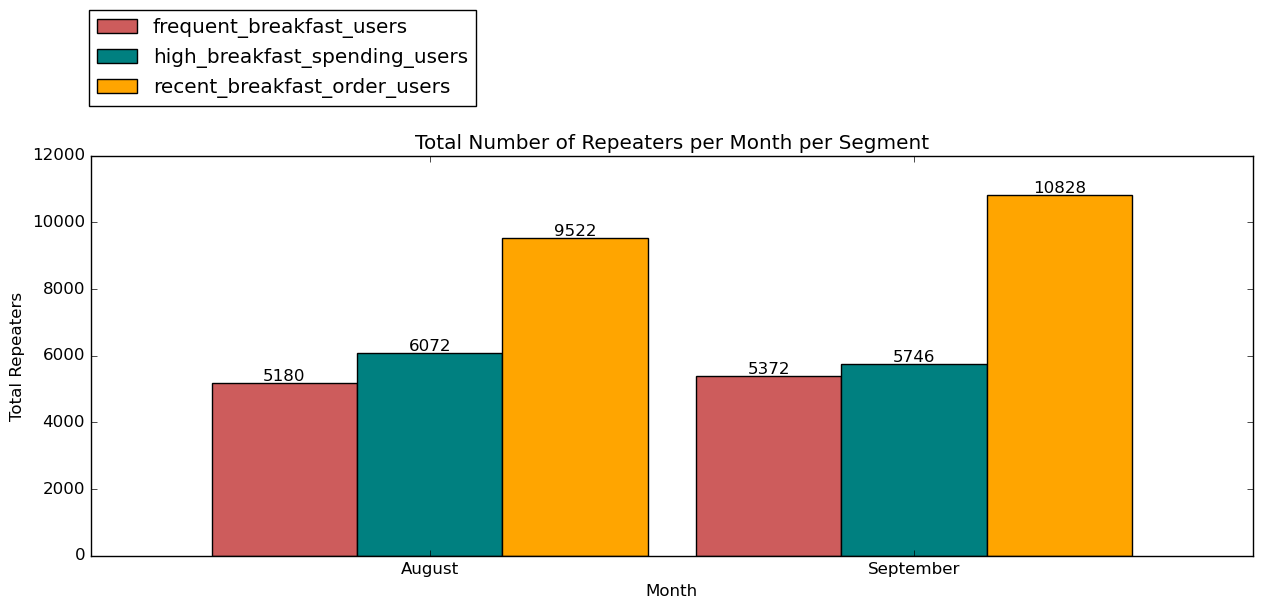

In [98]:
# plot comparison of repeaters per segment regarding total number of users
plot_repeaters_per_segment_users(segments_repeaters)

**Total Orders of repeaters per segment**

In [99]:
# group dfs per month 

# segment 1
segment1_orders_repeaters = repeaters_breakfast_segment_1.groupby(['month']).\
                                                               agg(orders_segment_1=('order_id','count'))
# segment 2
segment2_orders_repeaters = repeaters_breakfast_segment_2.groupby(['month']).\
                                                               agg(orders_segment_2=('order_id','count'))
# segment 3
segment3_orders_repeaters = repeaters_breakfast_segment_3.groupby(['month']).\
                                                               agg(orders_segment_3=('order_id','count'))

In [100]:
# merge dfs
orders_segments_repeaters = pd.merge(segment1_orders_repeaters.reset_index(), \
                            segment2_orders_repeaters.reset_index(), on='month')
orders_segments_repeaters = pd.merge(orders_segments_repeaters, segment3_orders_repeaters.reset_index(), on='month')

# set month as index
orders_segments_repeaters.set_index('month',inplace=True)

# preview
orders_segments_repeaters

,orders_segment_1,orders_segment_2,orders_segment_3
month,,,
August,66173,29490,75611
September,67475,27672,87536


* Orders from repeaters coming High breakfast spending users **decreased**, while orders repeaters coming from Frequent breakfast users and Recent breakfast order users **increased from August to September**
* Those variations in performance across the 3 different segments may warrant further analysis and strategy adjustments

**Plot Total Orders of Repeaters per Segment**

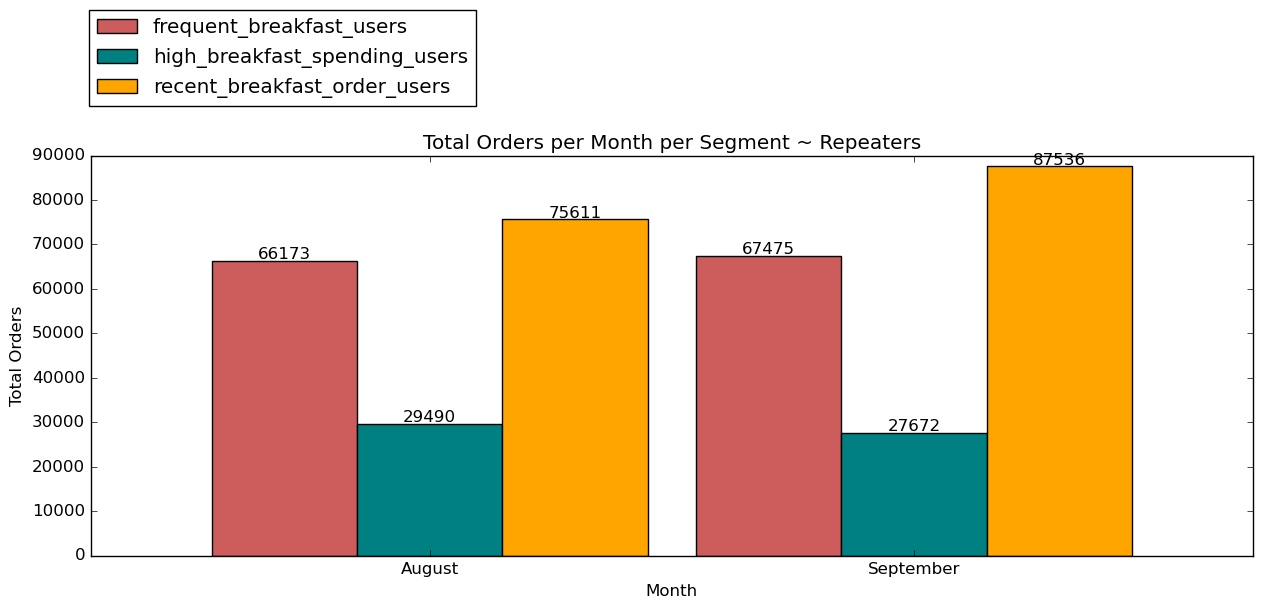

In [101]:
# plot comparison of repeaters per segment regarding total orderd
plot_repeaters_per_segment_orders(orders_segments_repeaters)

> ## (4) Segments per Location

In [102]:
breakfast.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False,0,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False,0,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True,0,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False,0,0,1
5,11586173047628,555845617152,Loyal,2023-09-20 10:40:07+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-20,2023,September,20,10:40:07,10,Wednesday,38,False,1,0,1,False,0,0,1


**Total Orders per City per Location**

In [103]:
# group by city
order_freq_hour = breakfast.groupby(['city']).agg(frequent_breakfast_users=('frequent_breakfast_users','sum'),\
                                                  high_breakfast_spending_users=('high_breakfast_spending_users','sum'),\
                                                  recent_breakfast_order_users=('recent_breakfast_order_users','sum'))

# preview
order_freq_hour

,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
city,,,
Άρτα,4348,751,6028
Αίγιο,5329,1698,6313
Αγρίνιο,25431,5258,32466
Αλεξανδρούπολη,11513,5289,17395
Αμαλιάδα,182,28,385
Διδυμότειχο,2234,680,3700
Δράμα,11101,4179,16237
Ζάκυνθος,1669,1547,2944
Ιωάννινα,13954,7466,25781


**Plot Total Orders per City per Location**

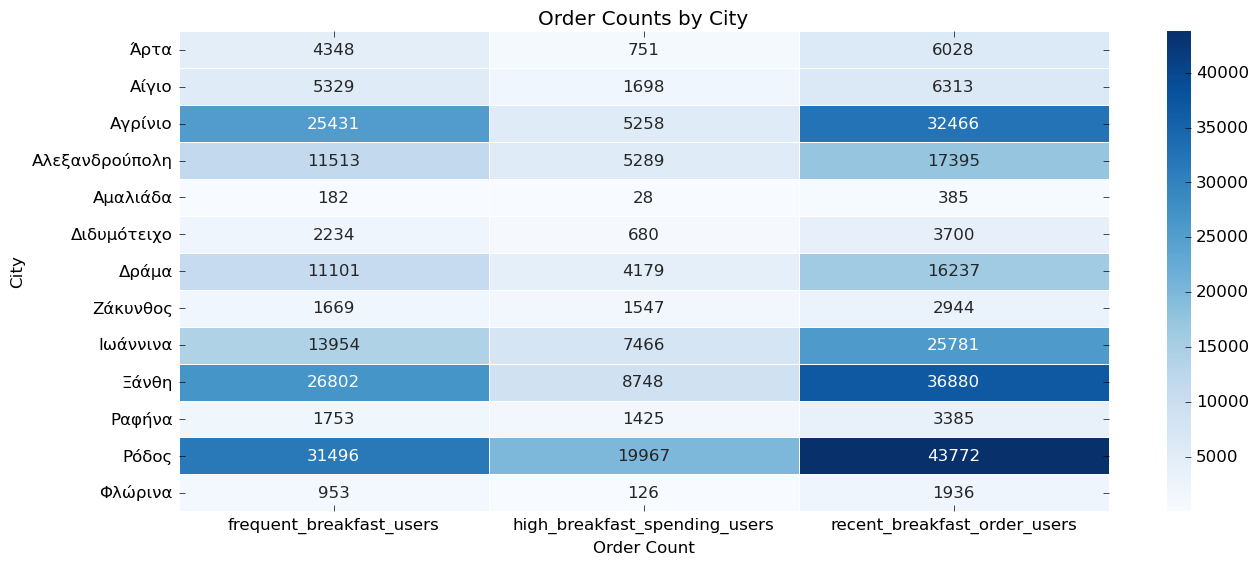

In [104]:
# function to plot total orders per city & per location
heatmap_orders_per_city_per_location(order_freq_hour)

* Rhodes, Xanthi and Agrinio are the **top 3 locations** in terms of orders for all three segments, while Amaliada, Florina and Didymoteicho are in the **bottom three locations**.
* It is likely that Rhodes is **susceptible due to the high summer season**, so we will have to see how the preference continues in the coming months

> ## (5) Previous engagements with discounts or coupons

In [105]:
breakfast.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost,revenue,date,year,month,dayofmonth,time,hour,dayofweek,week,flag_weekend,paid_online,paid_cash_v2,flag_repeaters,flag_discount,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-25,2023,September,25,10:57:40,10,Monday,39,False,1,0,1,False,0,0,1
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-23,2023,September,23,11:52:50,11,Saturday,38,False,1,0,1,False,0,0,1
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0,2.0,2023-08-25,2023,August,25,11:19:38,11,Friday,34,False,1,0,1,True,0,0,1
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-18,2023,September,18,12:13:43,12,Monday,38,False,1,0,1,False,0,0,1
5,11586173047628,555845617152,Loyal,2023-09-20 10:40:07+00:00,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0,2.0,2023-09-20,2023,September,20,10:40:07,10,Wednesday,38,False,1,0,1,False,0,0,1


**Orders coming from coupons per segment**

In [106]:
# group by offer flag
orders_having_offer_per_segment = breakfast.groupby(['order_contains_offer']).agg({'frequent_breakfast_users':'sum',\
                                                                                   'high_breakfast_spending_users':'sum',\
                                                                                   'recent_breakfast_order_users':'sum'})

# transpose df
orders_having_offer_per_segment = orders_having_offer_per_segment.T

# calculate percentage
orders_having_offer_per_segment['order_using_coupon_%'] = round(100*(orders_having_offer_per_segment.loc[:,1]/\
                                            (orders_having_offer_per_segment.loc[:,1]+orders_having_offer_per_segment.loc[:,0])),0)

#preview
orders_having_offer_per_segment

order_contains_offer,False,True,order_using_coupon_%
frequent_breakfast_users,119724,17041,12.0
high_breakfast_spending_users,51750,5412,9.0
recent_breakfast_order_users,173743,23479,12.0


**Orders coming from discounts per segment**

In [107]:
# group by discount flag
orders_having_discount_per_segment = breakfast.groupby(['flag_discount']).agg({'frequent_breakfast_users':'sum',\
                                                                                   'high_breakfast_spending_users':'sum',\
                                                                                   'recent_breakfast_order_users':'sum'})

orders_having_discount_per_segment

,frequent_breakfast_users,high_breakfast_spending_users,recent_breakfast_order_users
flag_discount,,,
False,131505,55659,190985
True,5260,1503,6237


In [108]:
# group by discount flag
orders_having_discount_per_segment = breakfast.groupby(['flag_discount']).agg({'frequent_breakfast_users':'sum',\
                                                                                   'high_breakfast_spending_users':'sum',\
                                                                                   'recent_breakfast_order_users':'sum'})

# transpose df
orders_having_discount_per_segment = orders_having_discount_per_segment.T

# calculate percentage
orders_having_discount_per_segment['order_using_discount_%'] = round(100*(orders_having_discount_per_segment.loc[:,1]/\
                                            (orders_having_discount_per_segment.loc[:,1]+orders_having_discount_per_segment.loc[:,0])),0)

#preview
orders_having_discount_per_segment

flag_discount,False,True,order_using_discount_%
frequent_breakfast_users,131505,5260,4.0
high_breakfast_spending_users,55659,1503,3.0
recent_breakfast_order_users,190985,6237,3.0


> ## Recommendations

We have created **three segment groups** that we can focus our campaign on:

* Frequent Breakfast Users which:
    * are the **12 % of all the users**
    * tend to **order in weekdays**, more specifically from Tuesday to Friday, with **peak hours 9 AM to 11 AM**
    * their **average revenue** per order is **quite small**, but their **total orders are many** which results in a high total revenue
    * the **12 %** of those users have order using **coupon** and the **4 % have order with discounts**, which means that they tend to **affect more from coupons**
    * the **repeaters have been increased** from August to September
    
* High Breakfast Spending Users which:
    * are the **15 % of all the users**
    * the **weekly distribution** of their orders is approximately **the same on all days**, with the exception of the weekend when there is a slight decrease
    * they have have the **highest average revenue per user**, indicating that users in this segment tend to spend more on average compared to the other segments
    * the **9 %** of those users have order using **coupon** and the **3 % have order with discounts**
    
* Recent Breakfast Order Users which:
    * are the **41 % of all the users**
    * exhibit a **preference** for ordering breakfast slightly **later in the morning** compared to the other two segments
    * their **average revenue** per order is **quite small**, but their **total orders are many** which results in a high total revenue
    * the **12 %** of those users have order using **coupon** and the **3 % have order with discounts**, which means that they tend to **affect more from coupons**
    * the **repeaters have been increased** from August to September 

Moreover, our campaign should **focus more on user who order from Rodos, Xanthi or Agrinio** due to the huge harvest of orders

Additionally, the **best hours to send the coupon is from 8 AM to 12 AM**

**Concluding:**

* if our goal is to **increase overall breakfast consuption and orderings**, we should target the users included in **Frequent Breakfast Users** segment
* if we aim to **promote premium breakfast offerings or increase revenue**, we should target the users in **High Breakfast Spending Users segment**
* if we want to **boost users who have already shown an interest in ordering breakfast** with a broader porpuse to keep their interest on, we should select users included in **Recent Breakfast Order Users** segment.
